# Wine Quality Dataset Classification Exercice(SecondVersion):
The purpose of this study is to determine how well a model can predict the perceived Quality of based in some of the most relevant physical and chemical properties of wine. The dataset was taken from: 'P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009'

The there are two datasets, one for red wine and another for white wines. Both contain the same variables but with different number of instances. Only one of the dataset will be chosen to perform the analysis. 

In [172]:
%matplotlib notebook
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import IPython
from IPython.display import display
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from yellowbrick.features import Rank2D
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
import pickle
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import multiprocessing
from multiprocessing import Process
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Data ingestion and Wrangling


In [173]:
# Setting display options:
pd.set_option('max_columns',50) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing the datasets:

In [174]:
raw_df_red = pd.read_csv("winequality-red.csv", sep =';')
raw_df_white = pd.read_csv("winequality-white.csv", sep =';')

## Exploring both datasets:

In [175]:
raw_df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [176]:

raw_df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The dataset that will be chosen for this exercise will be the white wine dataset, since it contains more instances(4898). The dataset does not contain missing values or non numerical data.

In [177]:
raw_df_white.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [178]:
raw_df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [179]:
df = raw_df_white

## Exploring the relationship between variables:

<IPython.core.display.Javascript object>


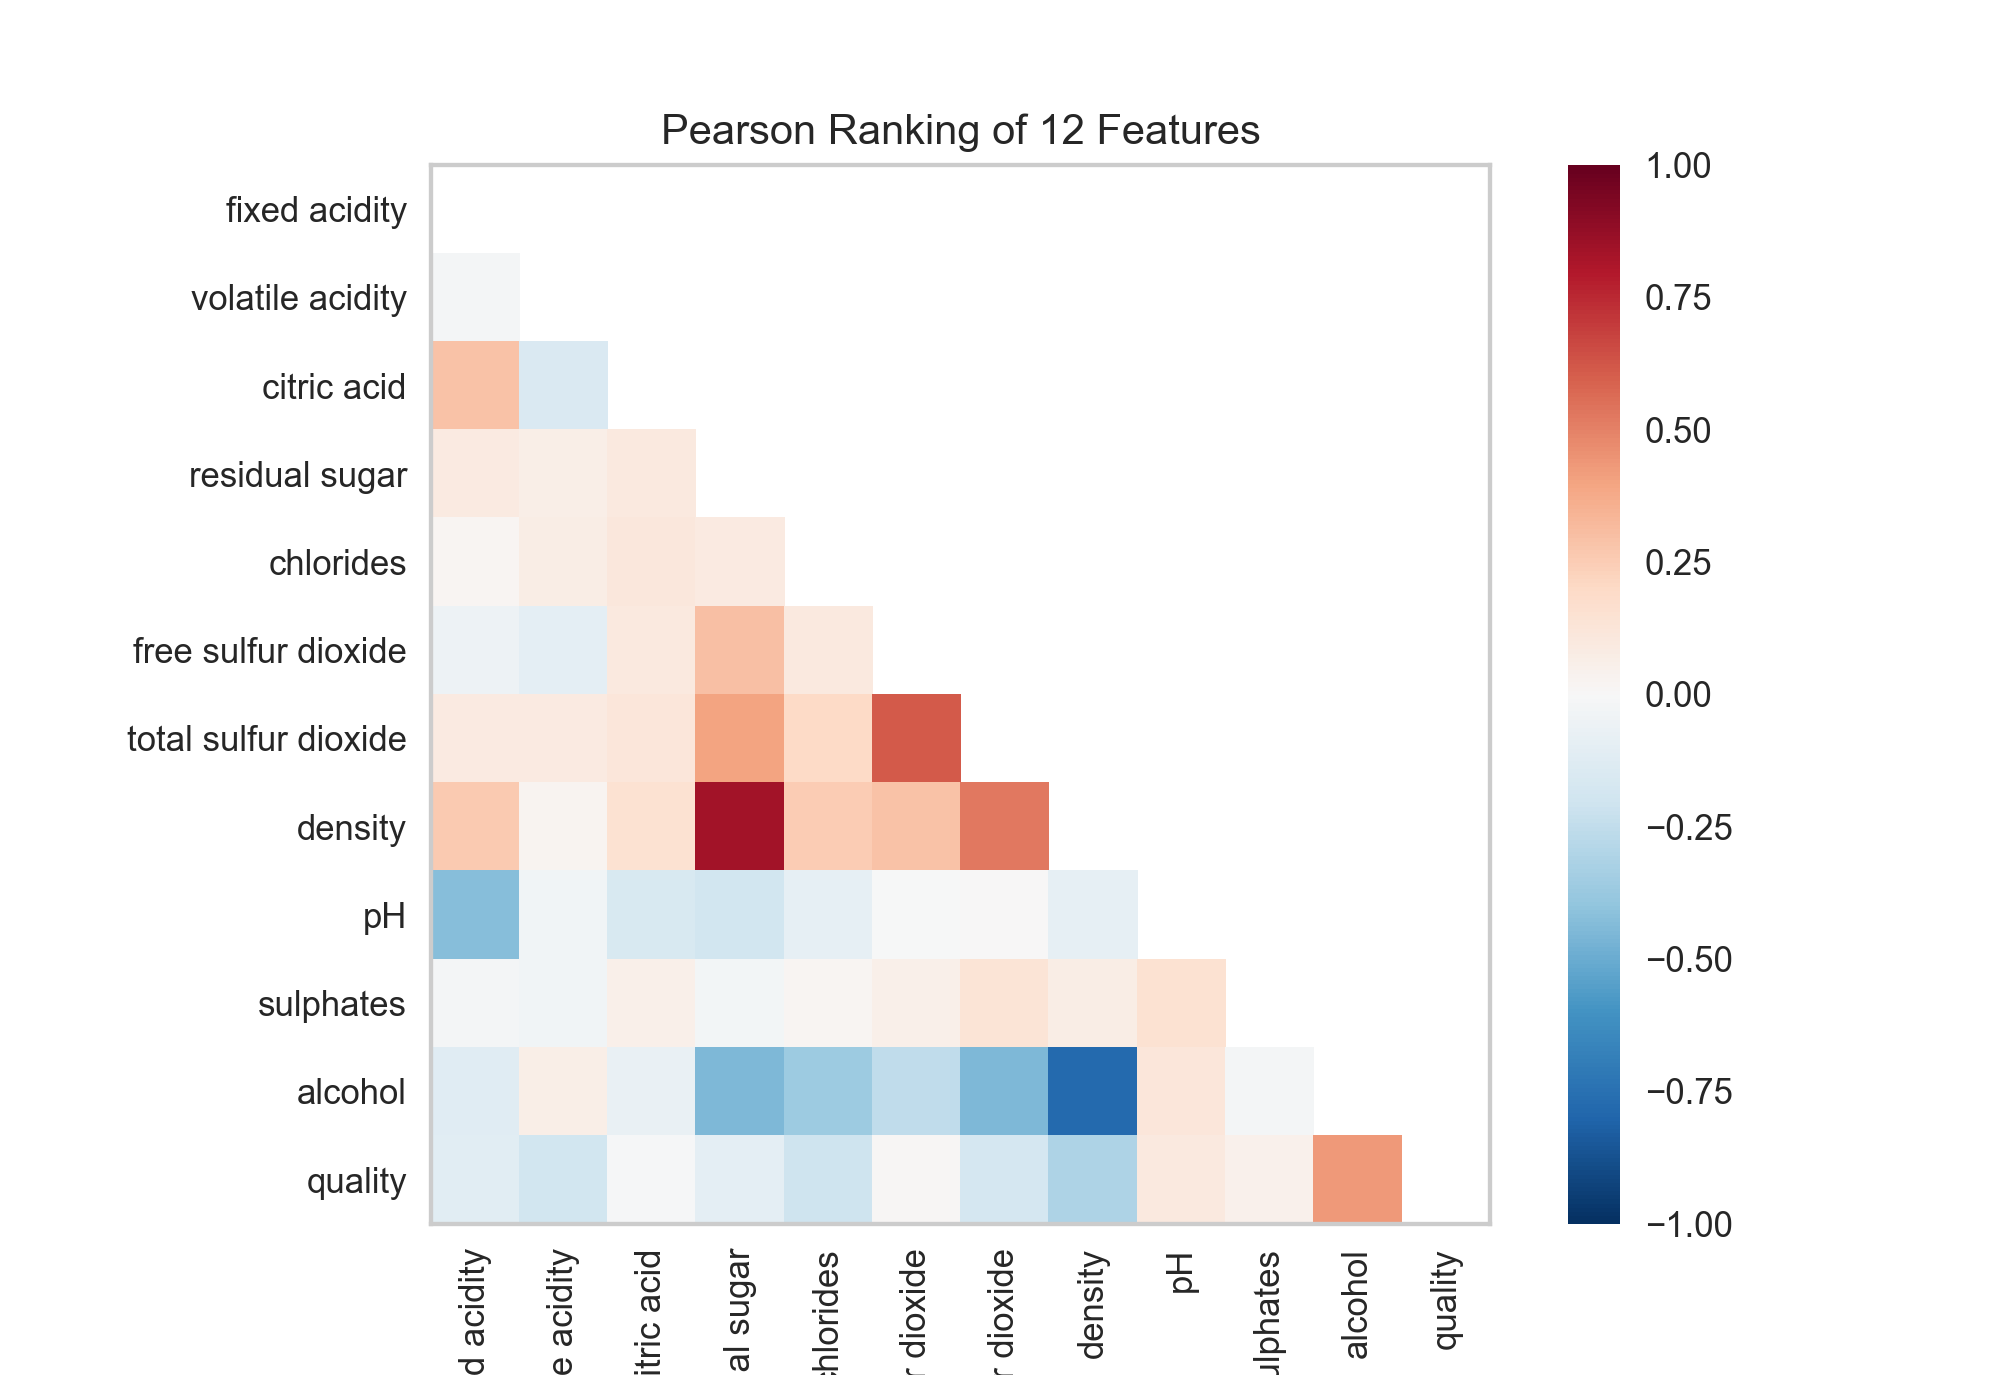

In [25]:
features = df.keys()
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(df.values)                
visualizer.transform(df.values)             
visualizer.poof()

The two most related variables here are density with sugar and density with alcohol content (negative).

### Selecting the target variable:

In [180]:
X = df.iloc[:,:-1] # independent variables X
y = df['quality'] # dependent Variables y

## Data Preprocessing and scaling

### Before Scaling

<IPython.core.display.Javascript object>


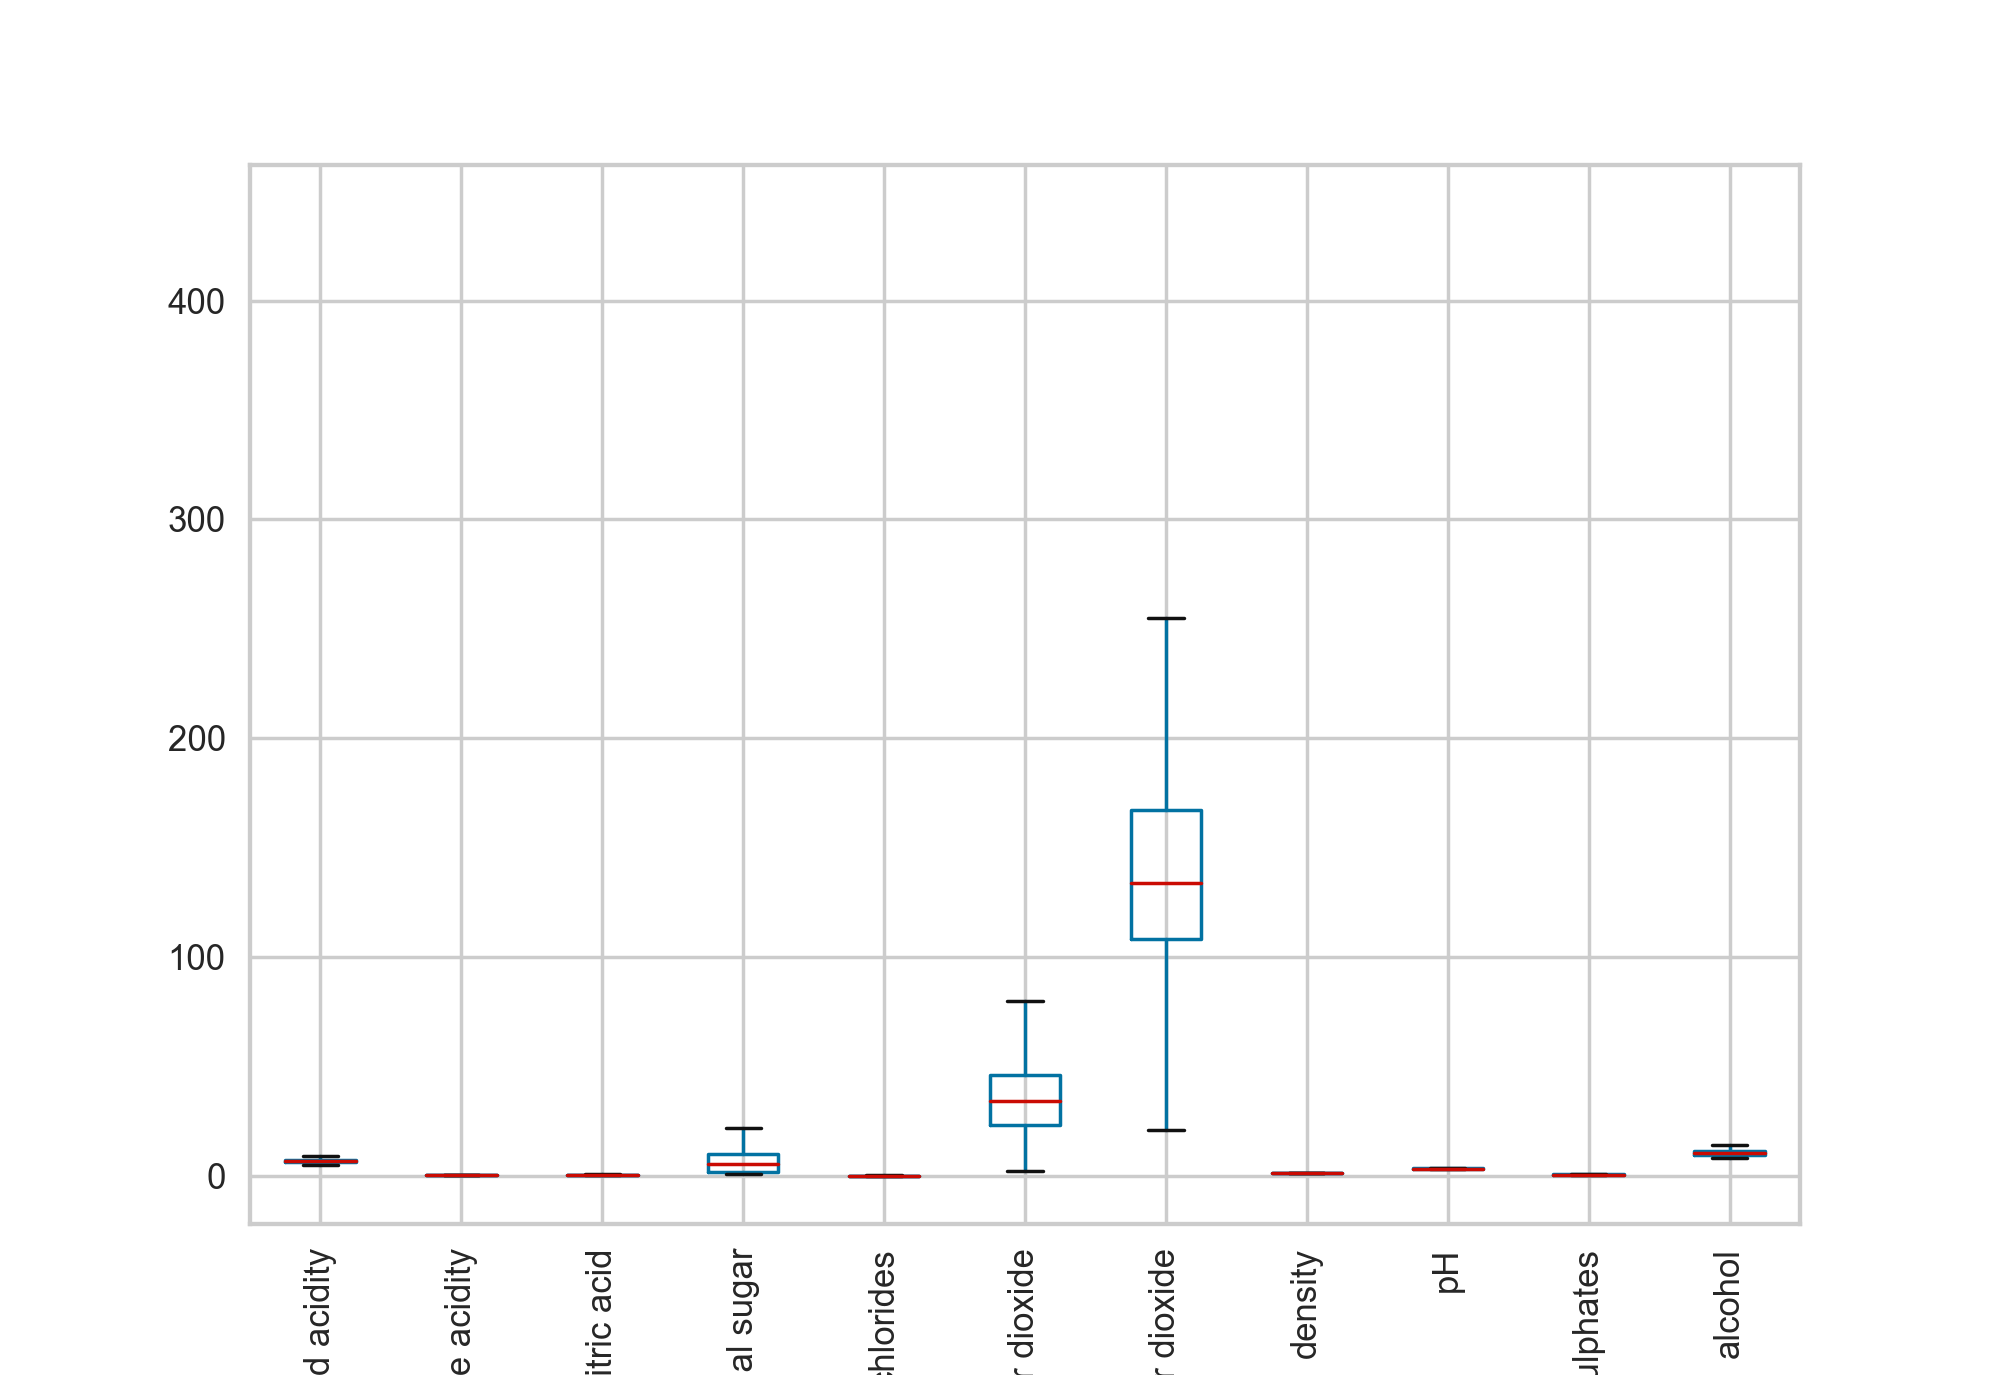

In [59]:
cols2 = pd.DataFrame(X)
cols2 = list(cols2.columns)

boxplot = X.boxplot(column=cols2, rot=90, fontsize=10)

### After Scaling Using MinMax Scaler:

<IPython.core.display.Javascript object>


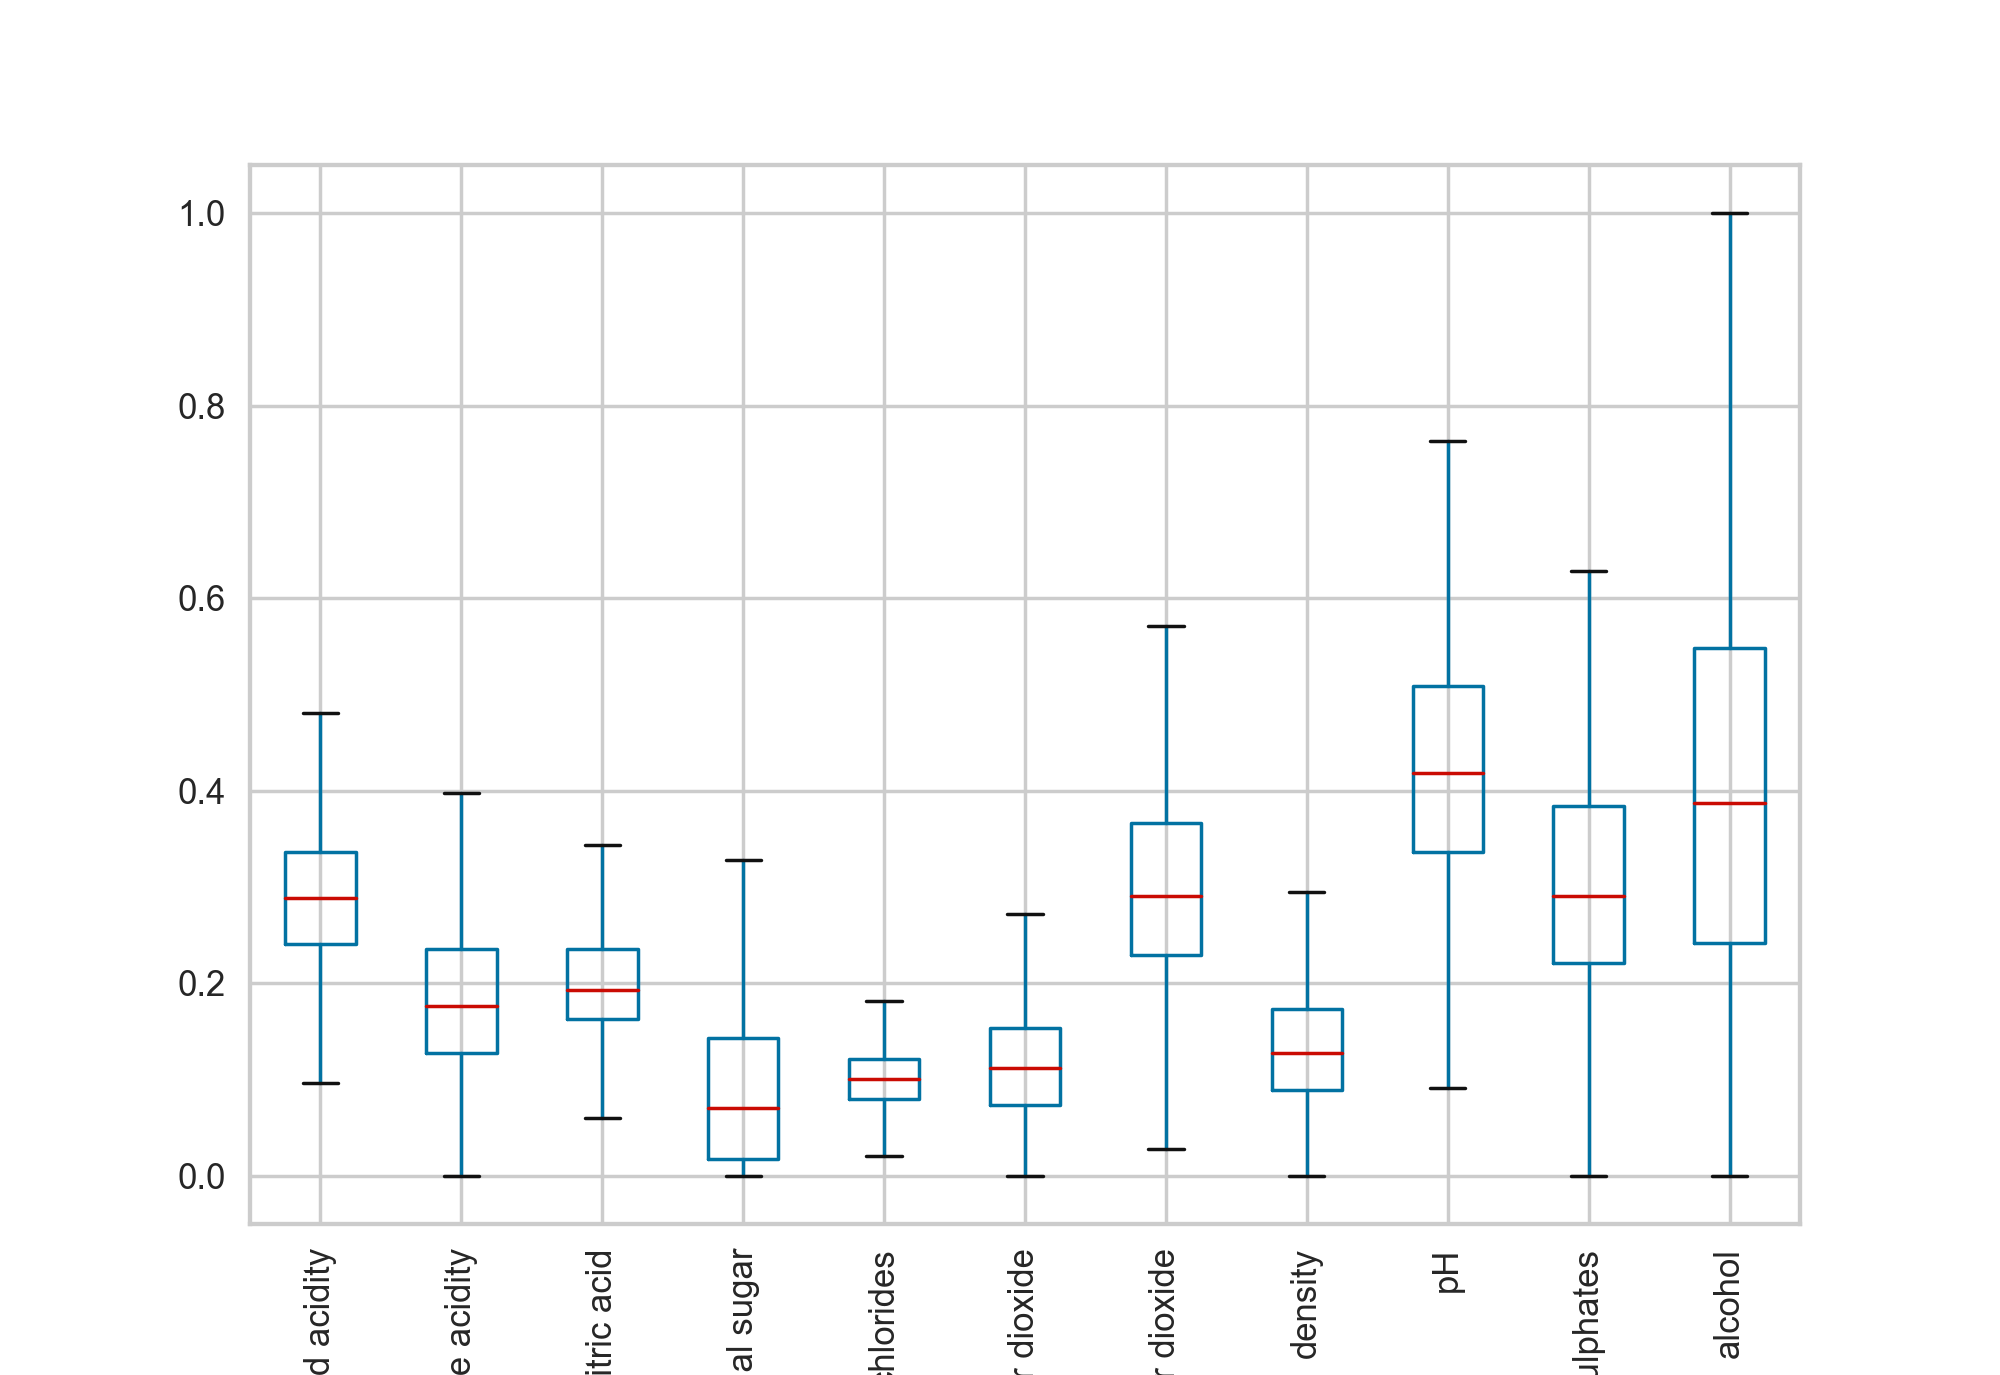

In [60]:
minmax_scaler =  MinMaxScaler(feature_range=(0, 1)) 
X_minmax = minmax_scaler.fit(X).transform(X)
X_minmax = pd.DataFrame(X_minmax)
X_minmax.columns = X.columns
cols2 = pd.DataFrame(X_minmax)
cols2 = list(cols2.columns)
boxplot = X_minmax.boxplot(column=cols2, rot=90, fontsize=10)

### After scaling using StandardScaler

<IPython.core.display.Javascript object>


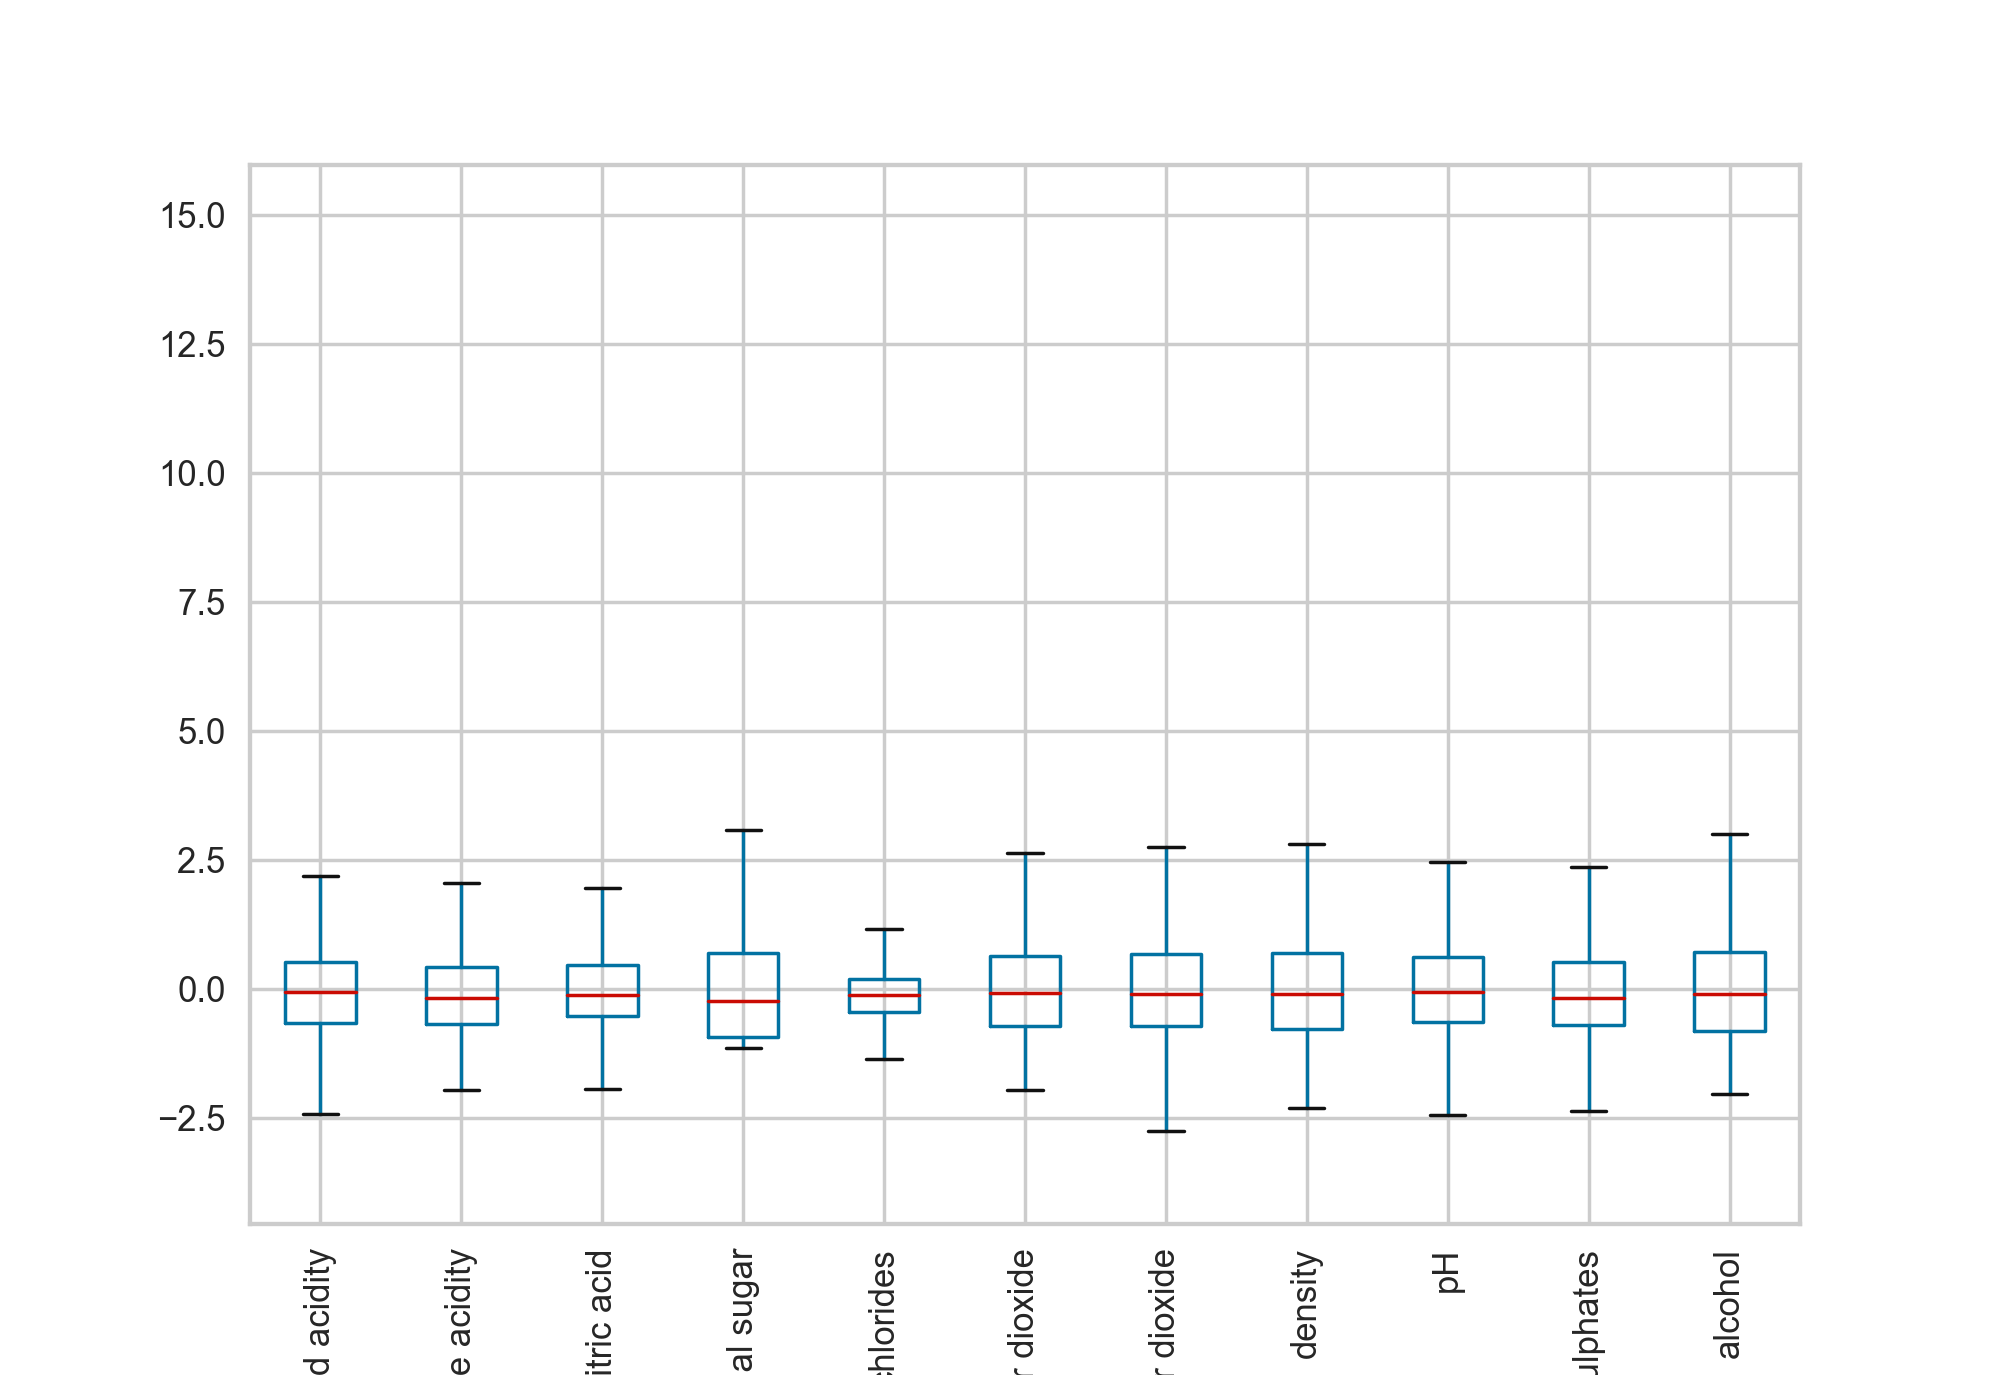

In [61]:
scaler =  StandardScaler() 
X_std = scaler.fit(X).transform(X)
X_std = pd.DataFrame(X_std)
X_std.columns = X.columns
cols2 = pd.DataFrame(X_std)
cols2 = list(cols2.columns)



boxplot = X_std.boxplot(column=cols2, rot=90, fontsize=10)

It is very clear that here, the best method for scaling is StandardScaling

## Defining the trainin set and the test set:


In [62]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2,random_state= 0)
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.fit(X_test).transform(X_test)

## Feature importance analysis:

<IPython.core.display.Javascript object>


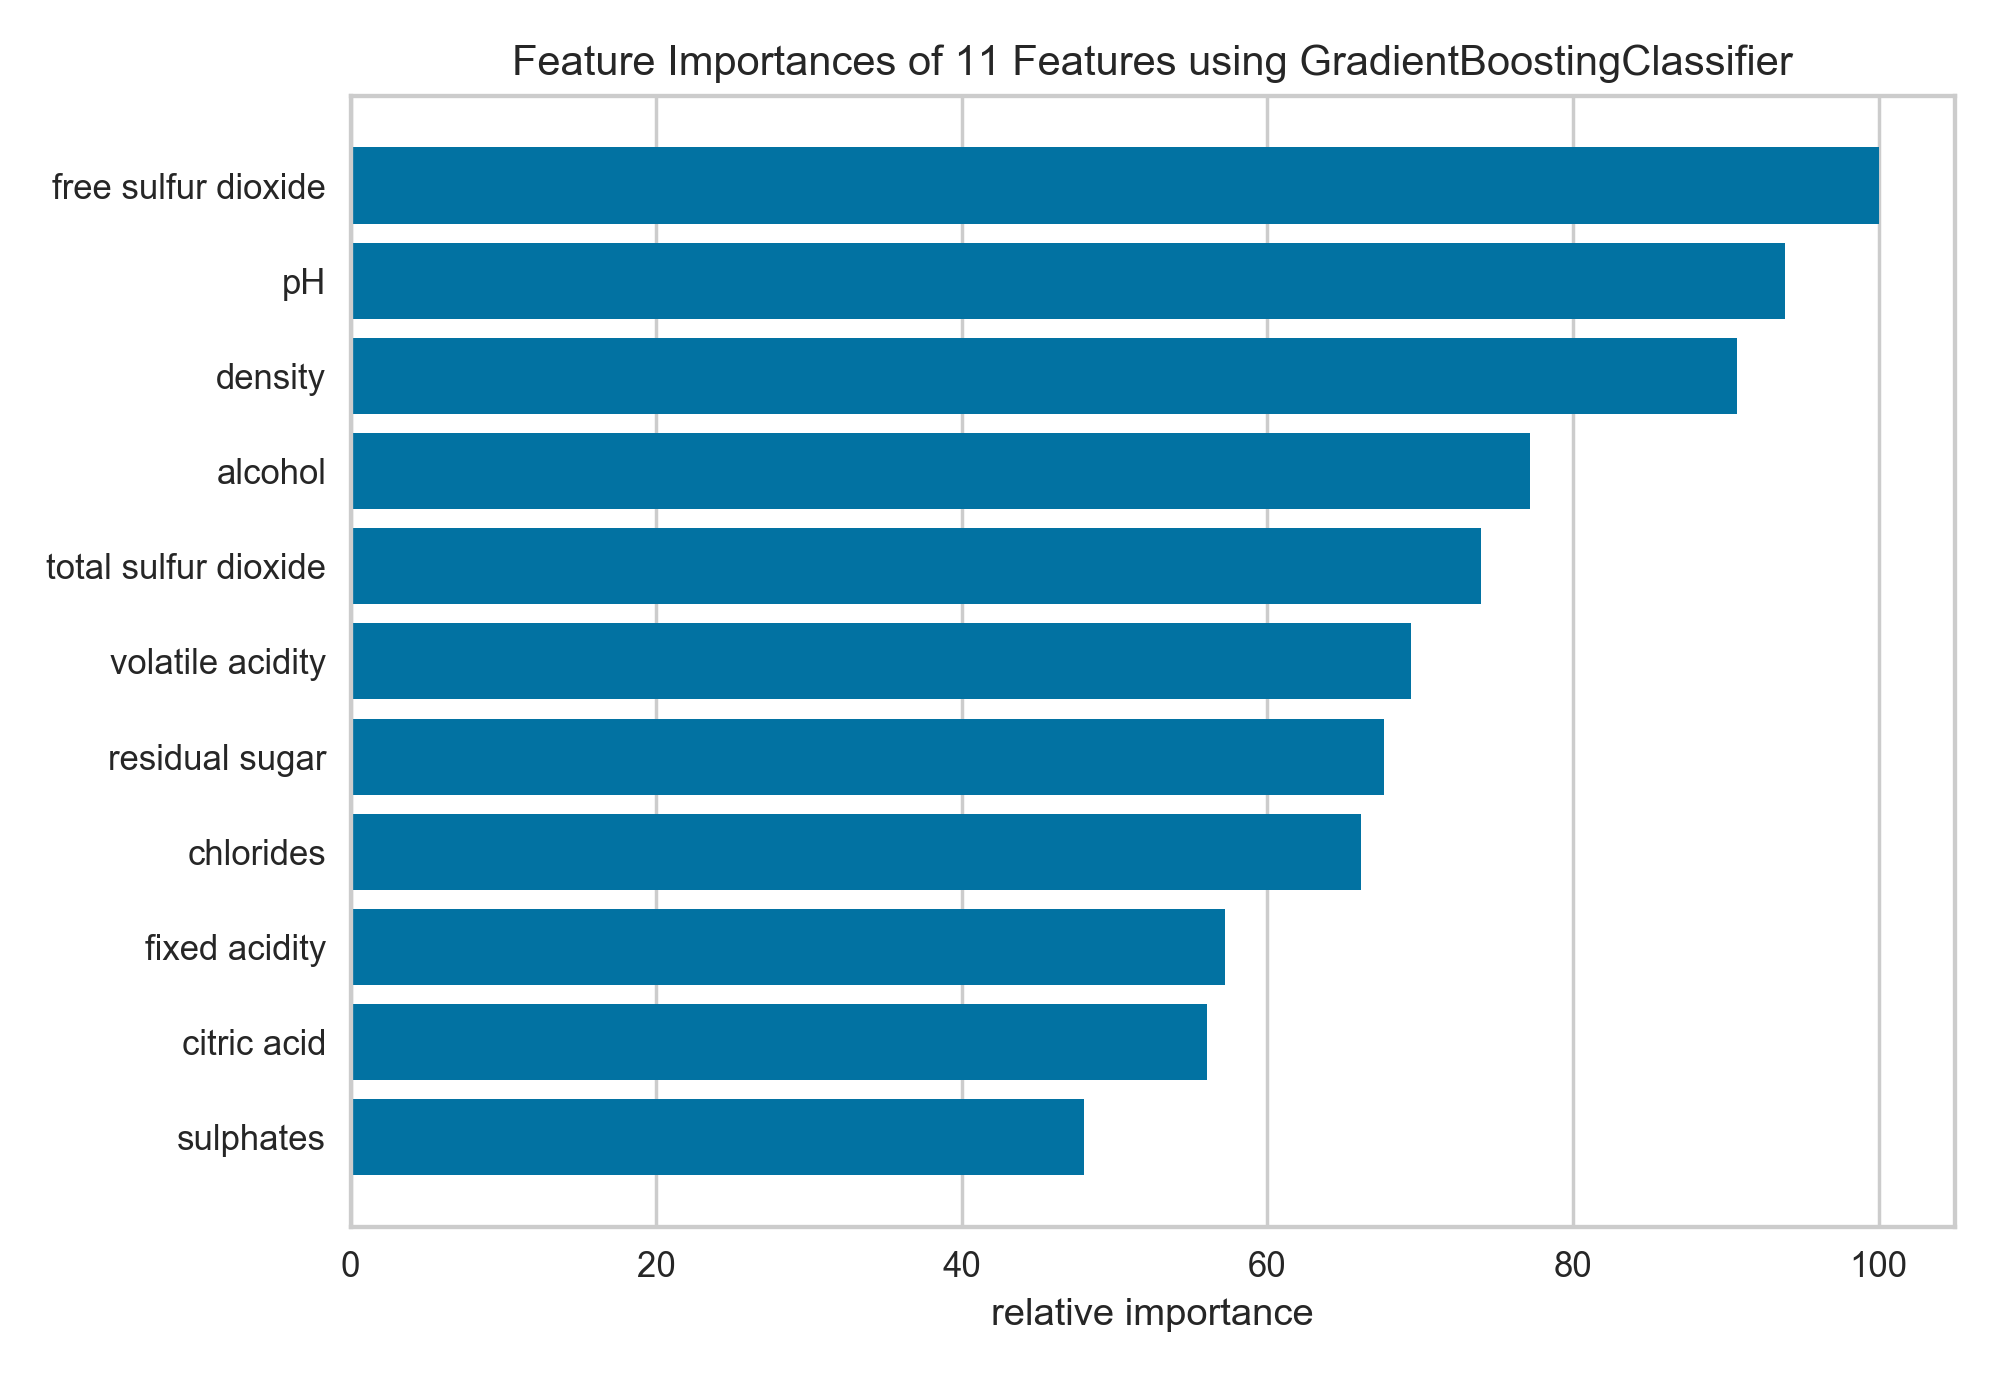

In [63]:
features = X.keys()
Xi = X[features]
yi = y
figure = plt.figure()
axis = figure.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=axis)
viz.fit(Xi, yi)
viz.poof()

## Optimal Number of features using recursive feature elimination:



In [78]:
def rec_fe(target, data, filename):
    
    if __name__ == '__main__':

        cls = GradientBoostingClassifier()
        rfecv = RFECV(estimator=cls, step=1, cv=KFold(12), scoring='accuracy', verbose = 10, n_jobs = -1)
        rfecv.fit(data,target)
        optimal_features = rfecv.n_features_

        print("Optimal number of features : %d" % rfecv.n_features_) 

        with open(filename, 'wb') as features:
            pickle.dump([optimal_features, rfecv] , features)

In [79]:
rec_fe(y_train,X_train, 'OptimalFeatures_classification.pickle')

Optimal number of features : 11


In [80]:
with open('OptimalFeatures_classification.pickle', "rb") as feature:
    feat = pickle.load(feature, encoding="utf8")

rfecv = feat[1]

<IPython.core.display.Javascript object>


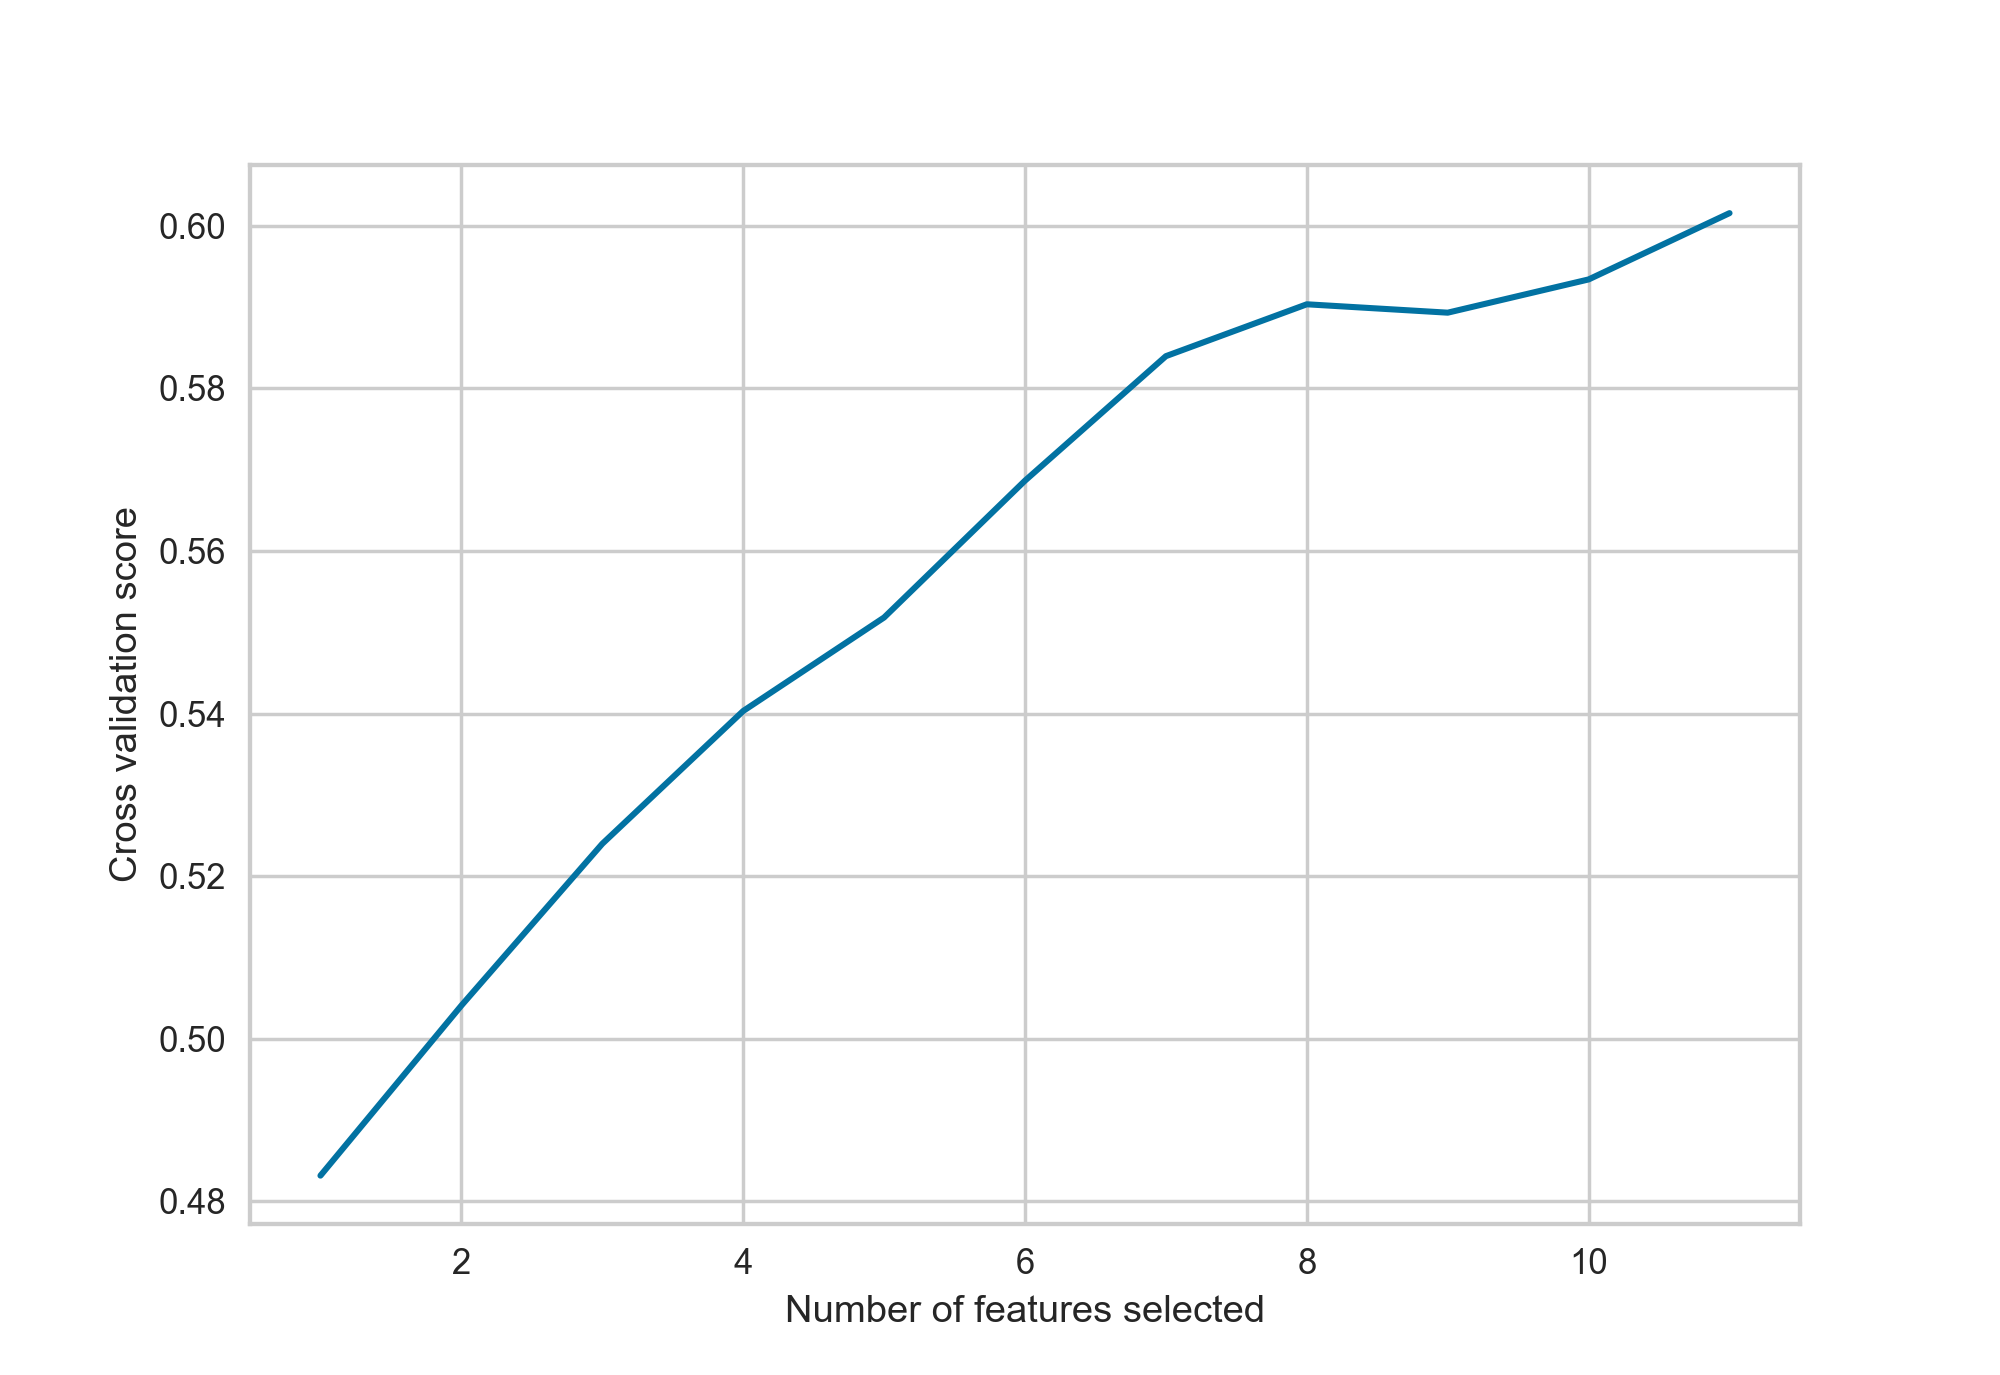

In [82]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

I this case, the best approach will be to use all the features.

# Model Selection

In [109]:
yi = pd.DataFrame(y)
yi.describe()

,quality
count,4898.000000
mean,5.877909
std,0.885639
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


In [136]:
def classifier_graph(classifier):
    classes = ['3','4','5','6','7','8'] 
    model = classifier
    visualizer = ClassificationReport(model, classes=classes)

    X_train_ = pd.DataFrame(X_train)
    X_test_ = pd.DataFrame(X_test)
    visualizer.fit(X_train_, y_train)  
    visualizer.score(X_test_, y_test)  
    g = visualizer.poof()             

c:\users\franc\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<IPython.core.display.Javascript object>


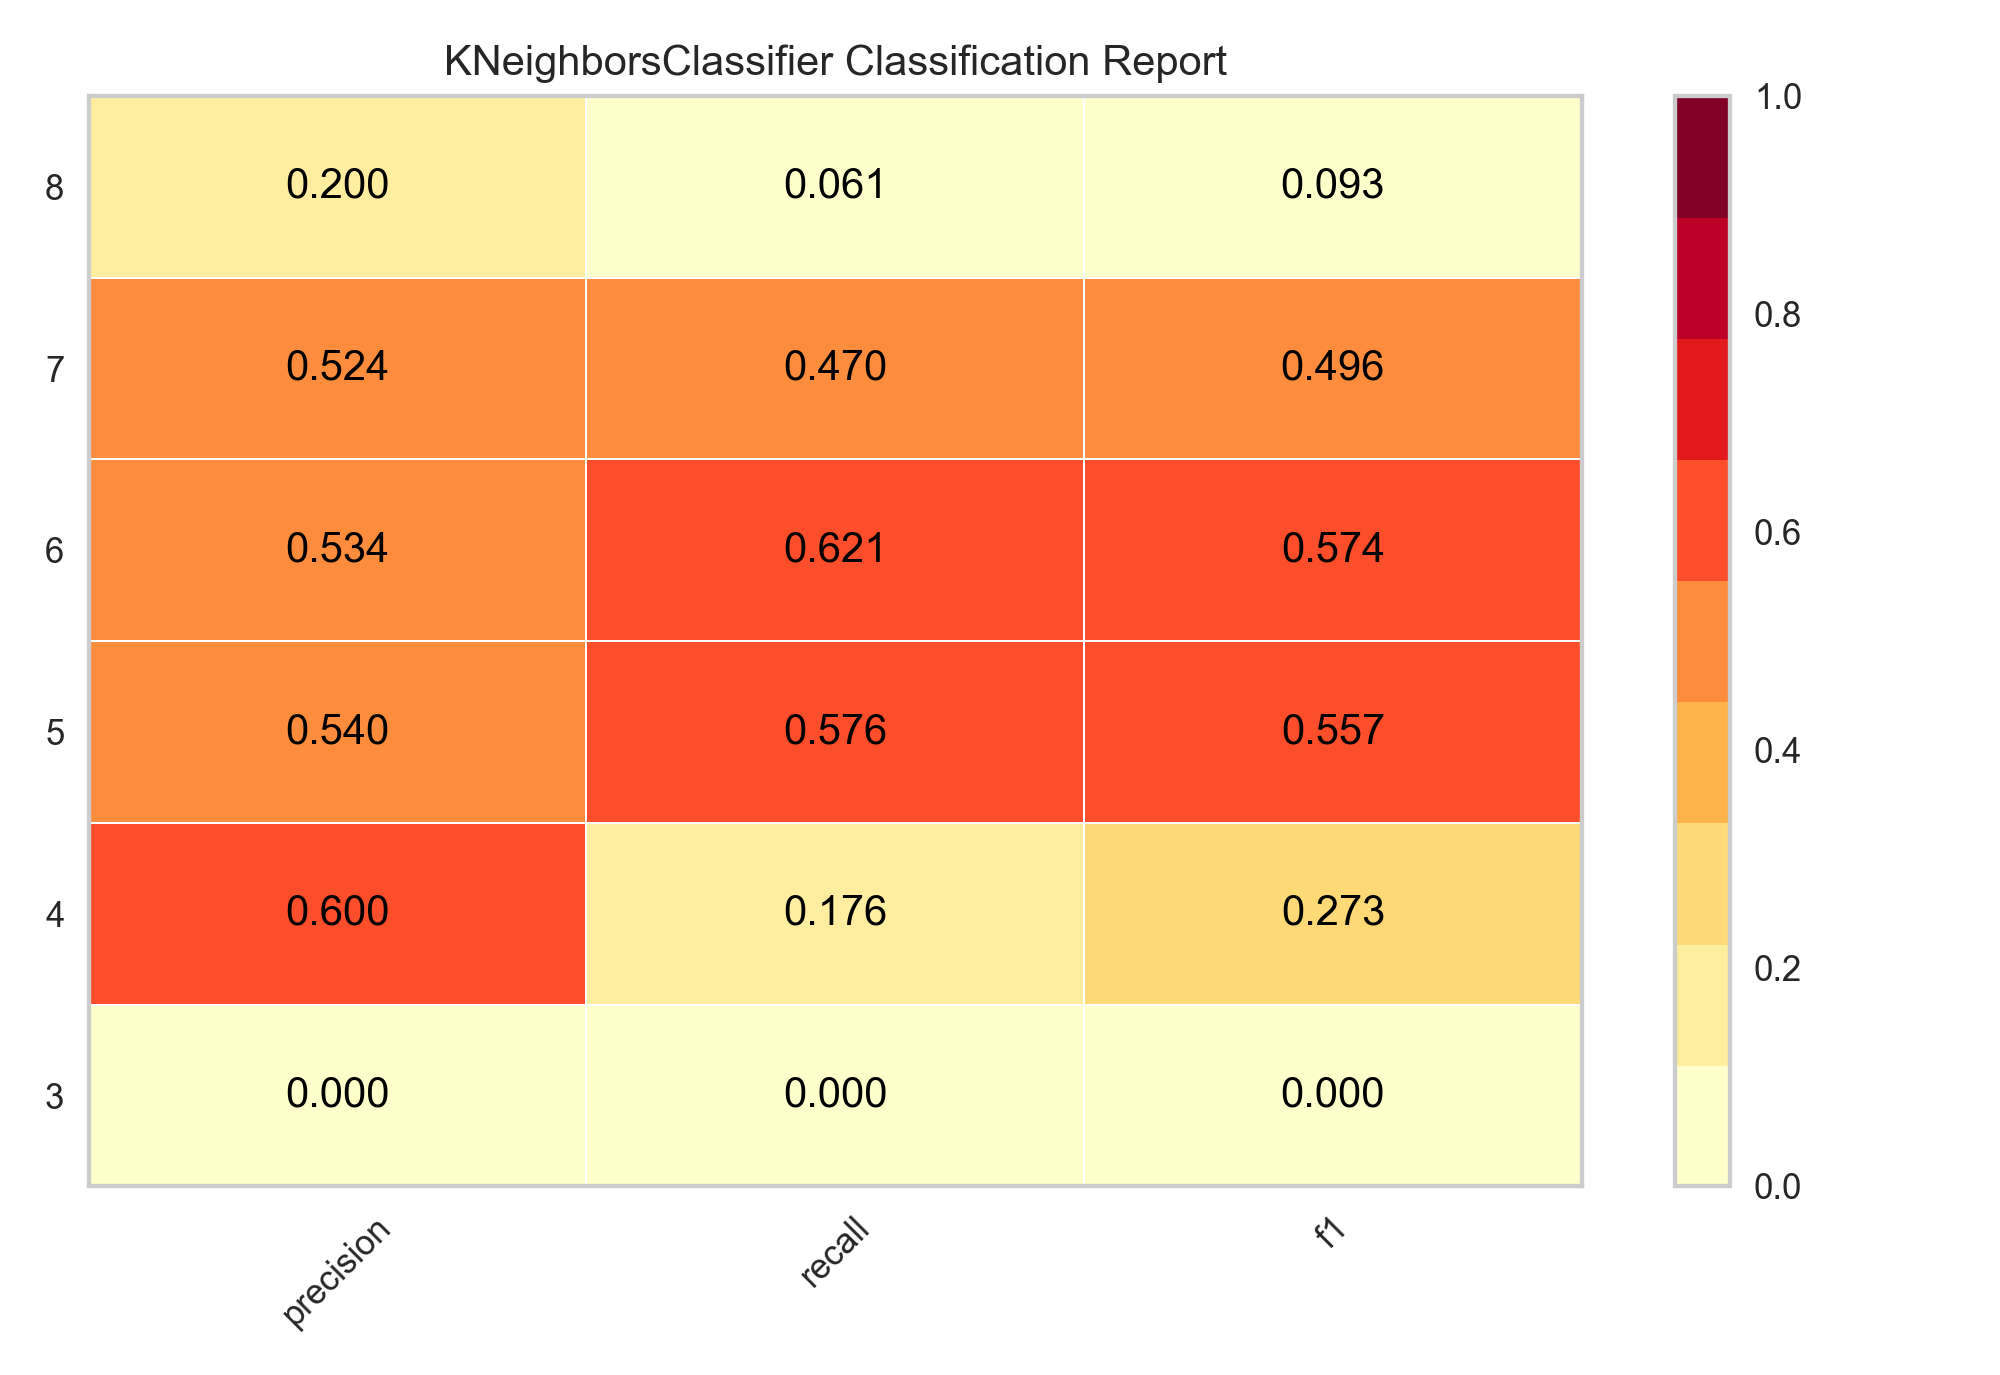

In [137]:
knn = classifier_graph(KNeighborsClassifier())

c:\users\franc\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<IPython.core.display.Javascript object>


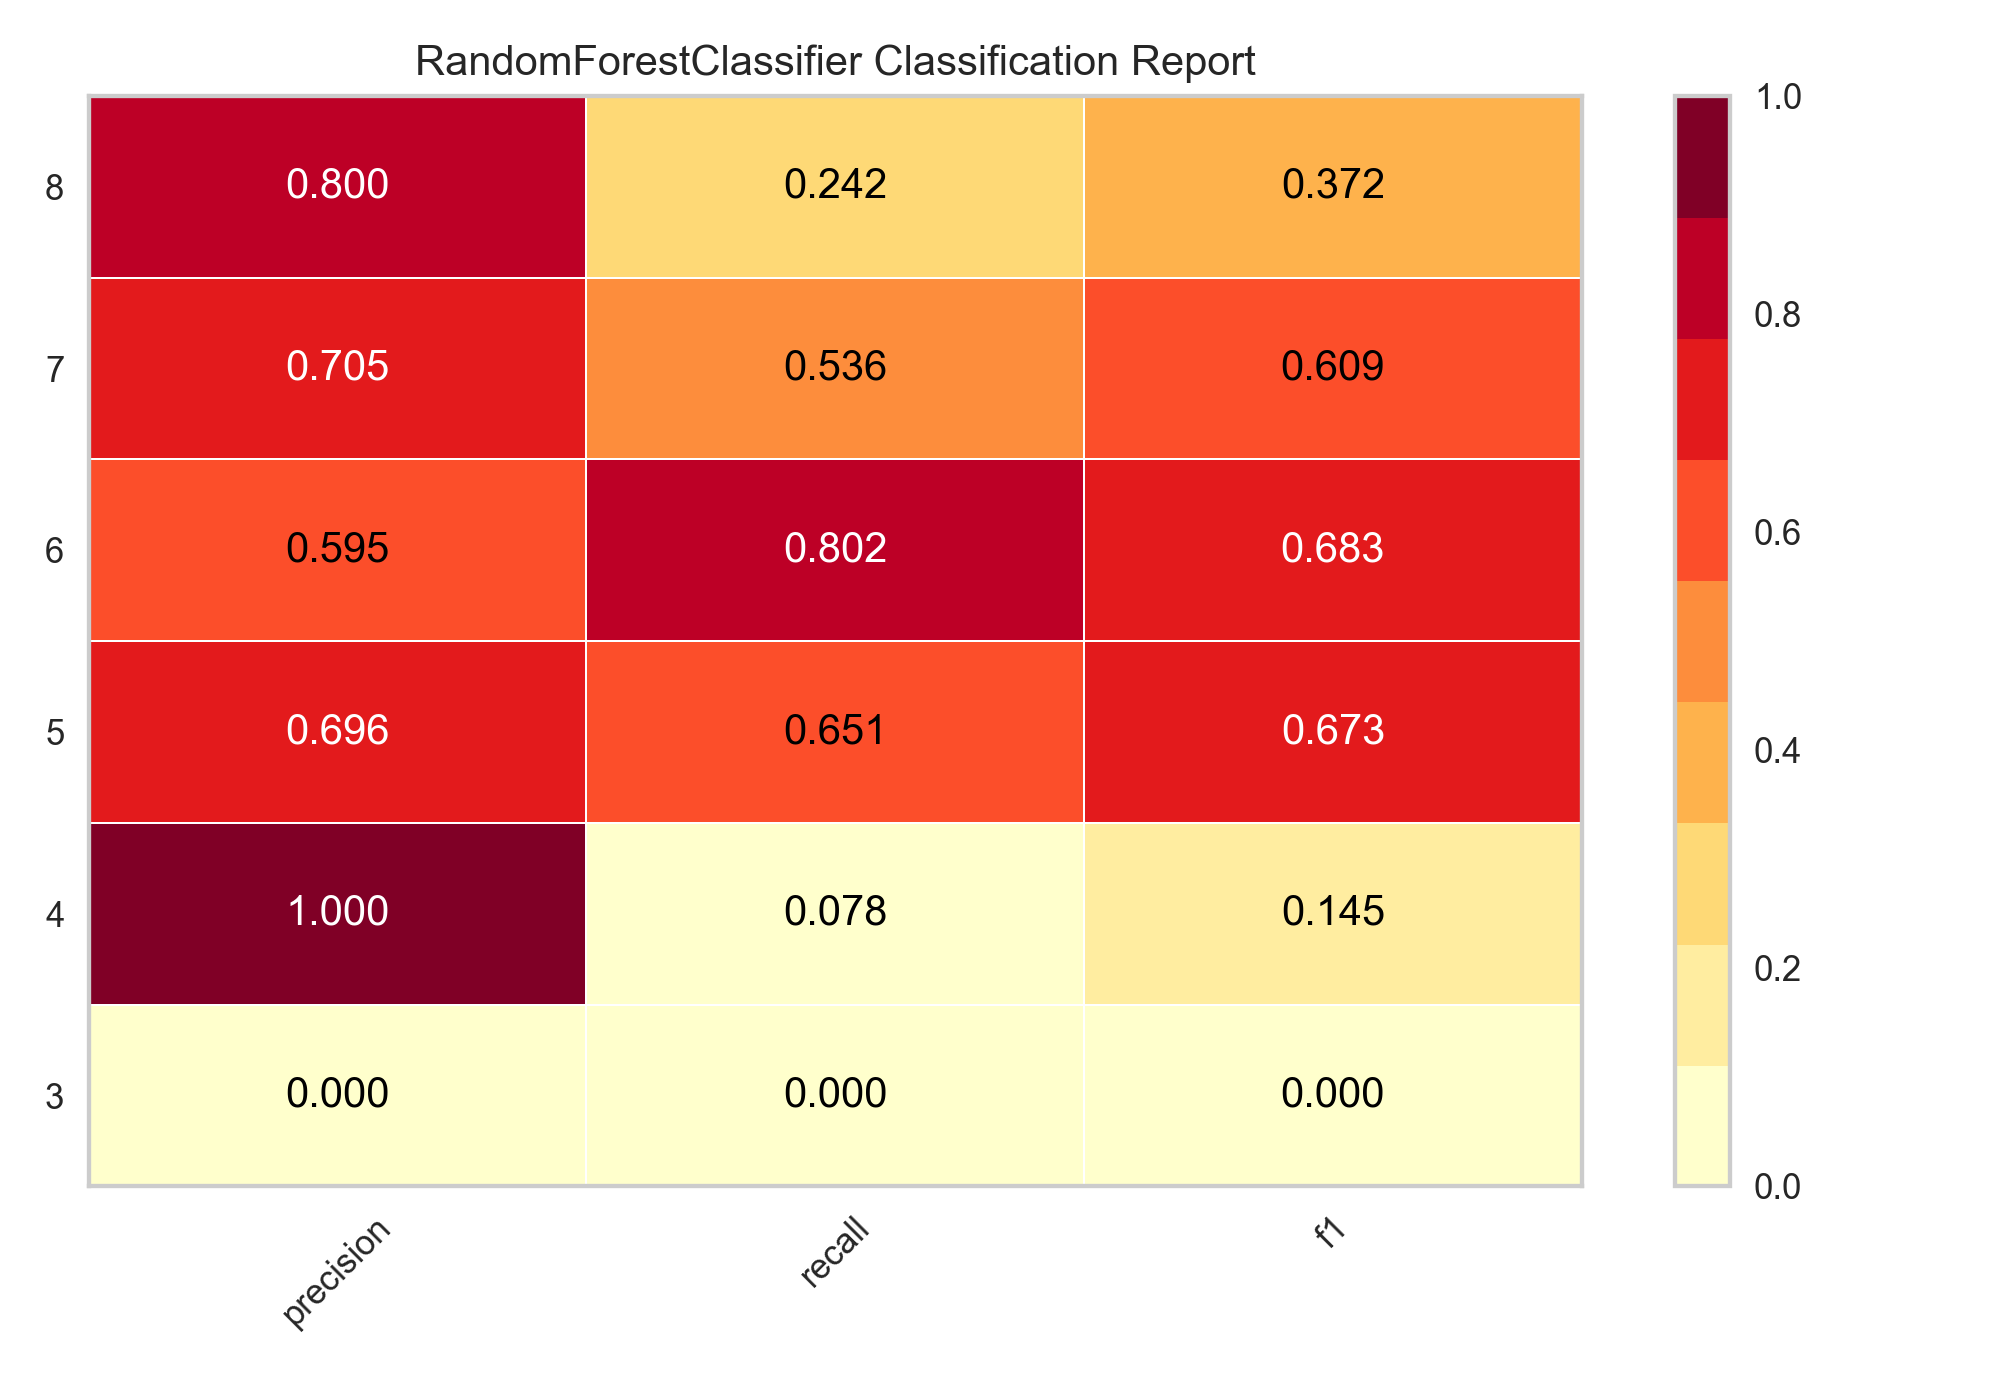

In [140]:
forest = classifier_graph(RandomForestClassifier(n_estimators=100,n_jobs = -1))

c:\users\franc\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<IPython.core.display.Javascript object>


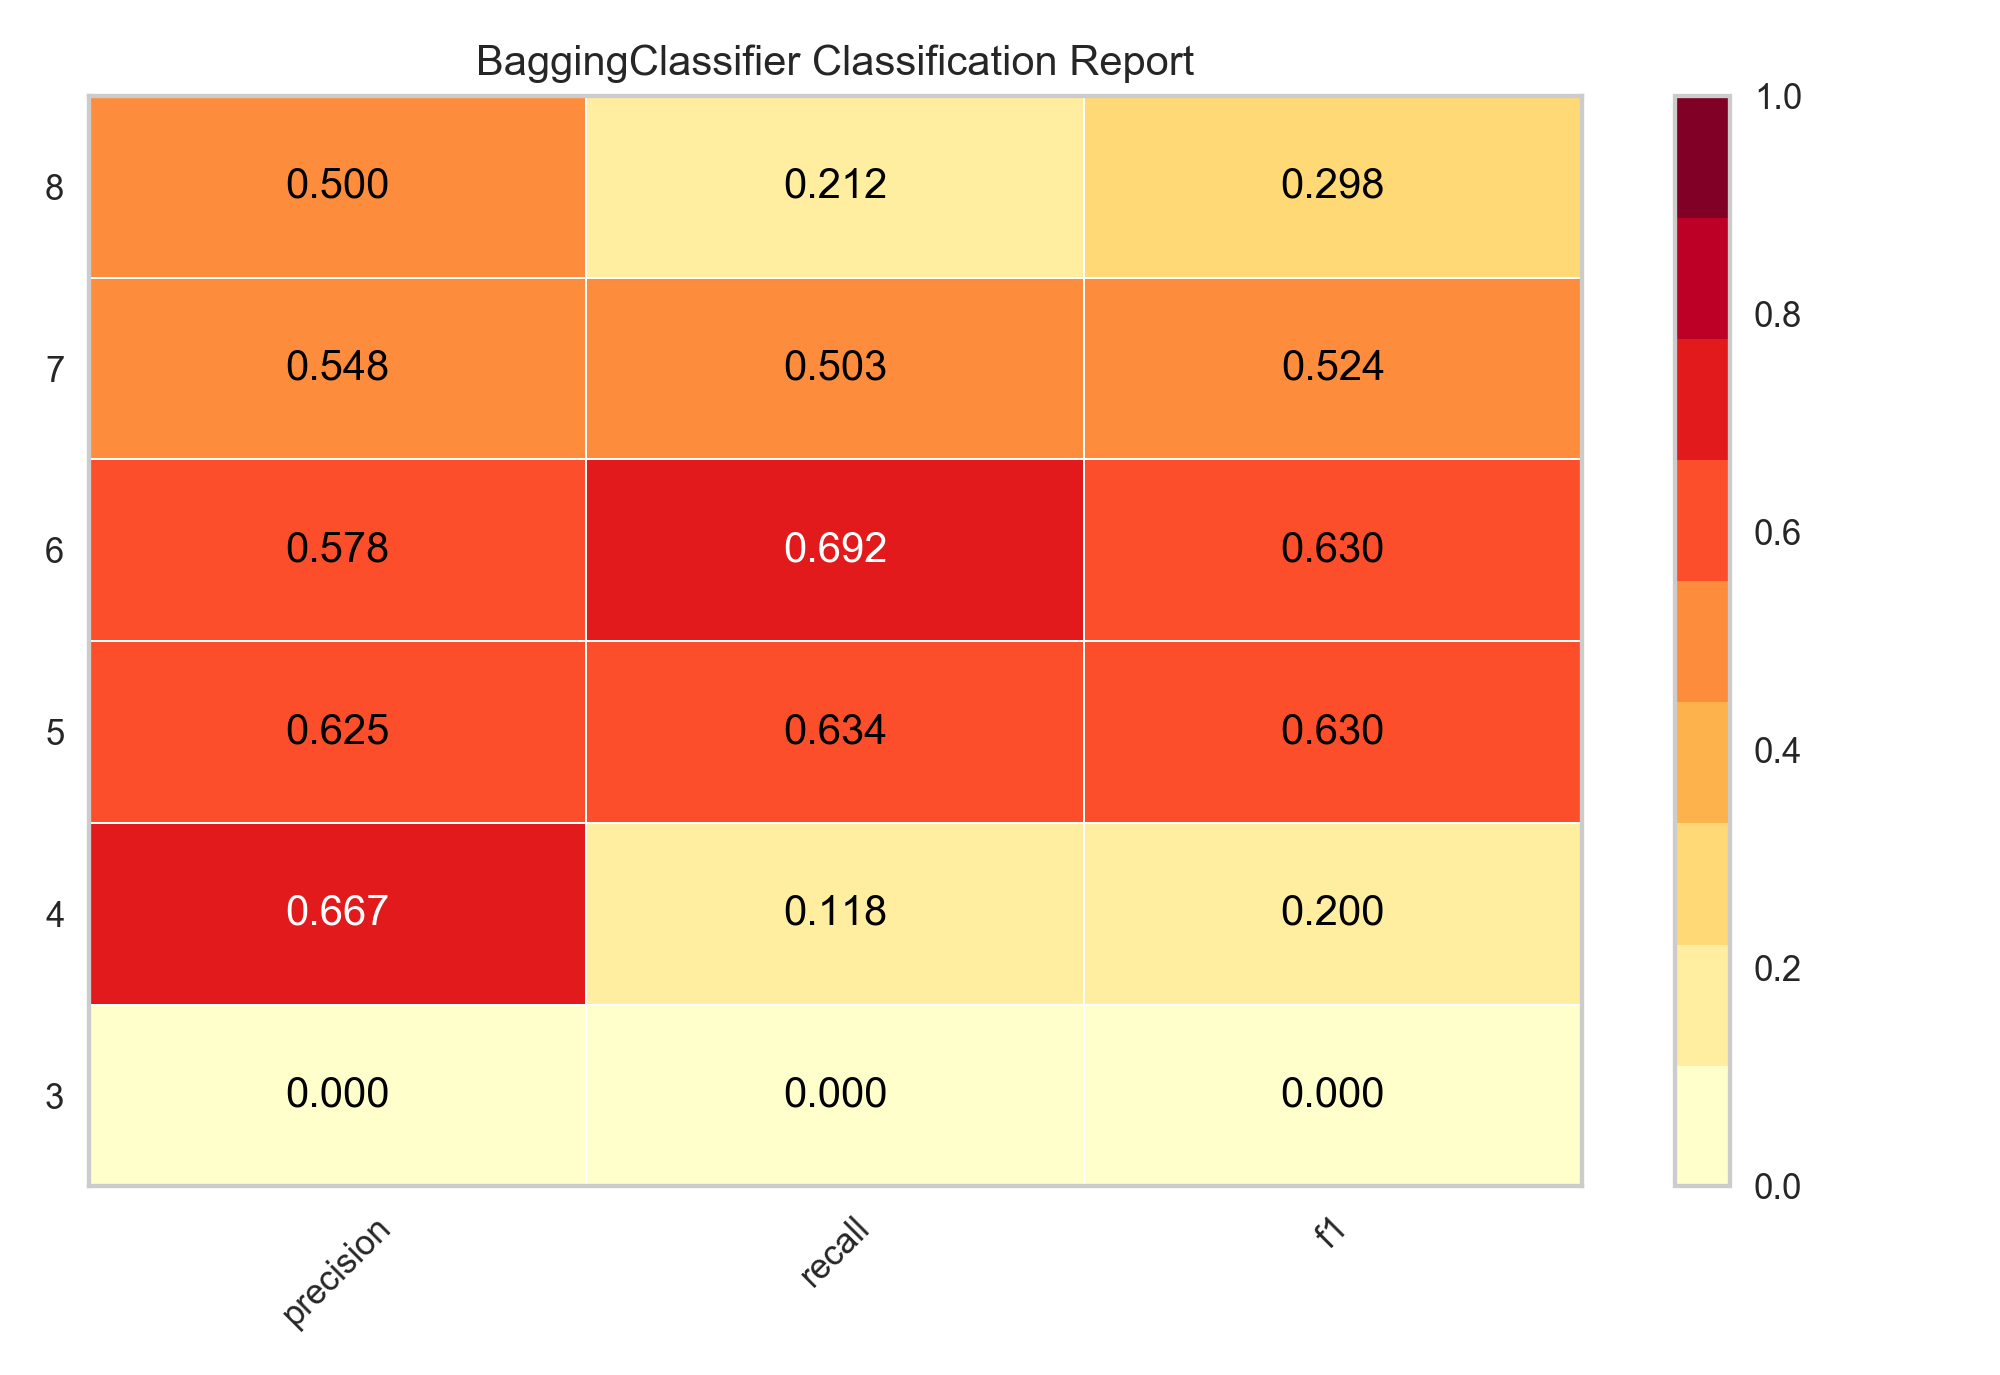

In [142]:
baggin = classifier_graph(BaggingClassifier())

c:\users\franc\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<IPython.core.display.Javascript object>


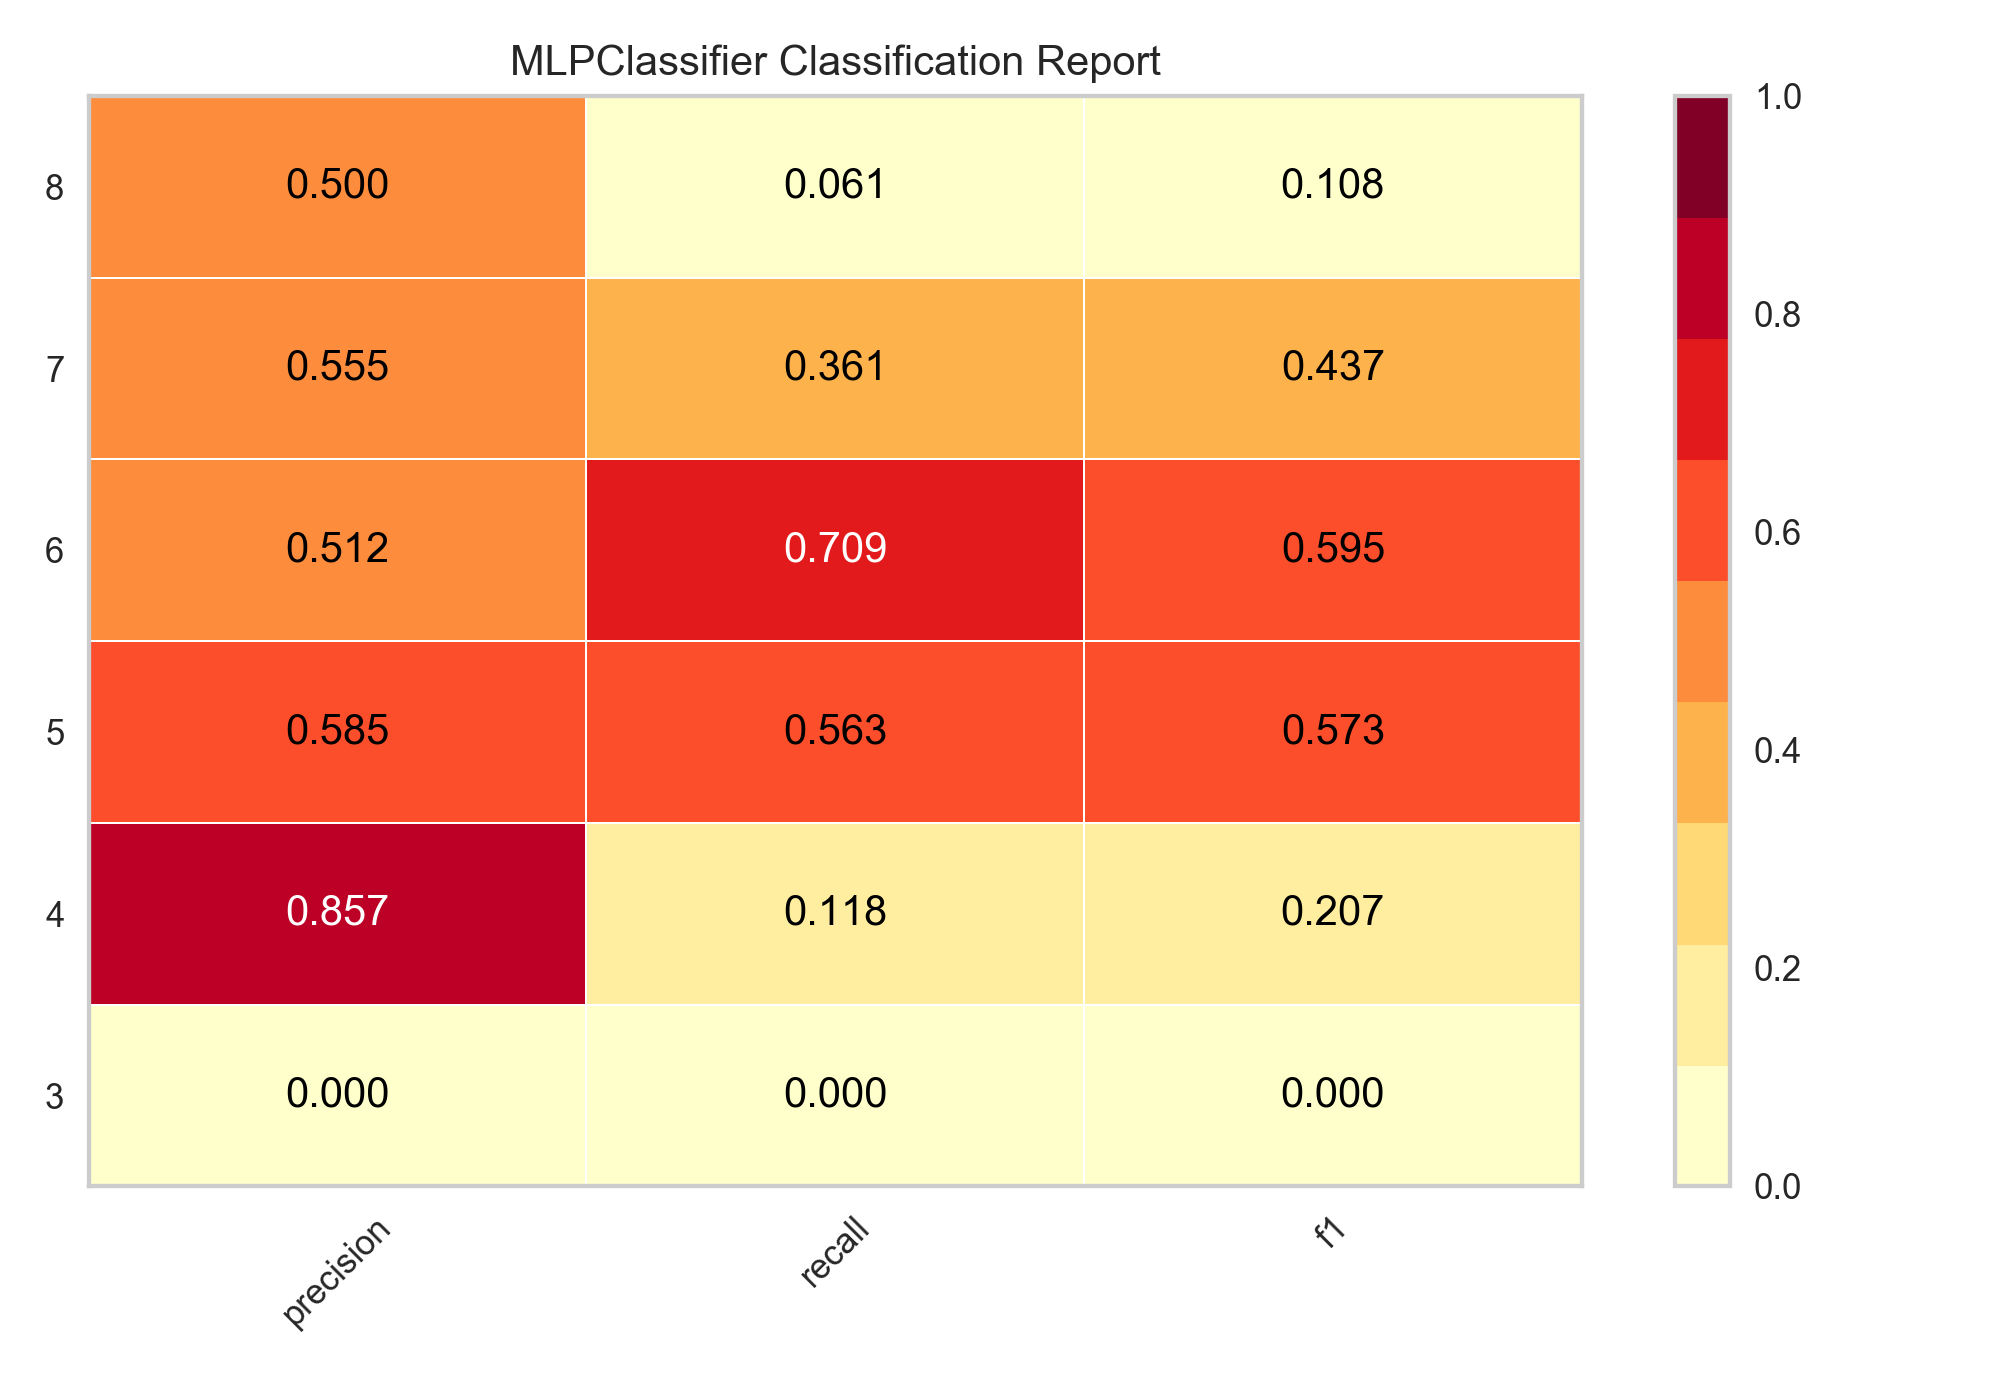

In [143]:
MLP = classifier_graph(MLPClassifier())

As it can be appreciated above, there is a significant class imbalance. Before proceding I will deal with this using upsampling.
In the next section I will use only RandomForestClassifier and KNNClassifier. 

## Dealing with Class imbalance

In [188]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
rovs = RandomOverSampler(random_state=4)
X, y = rovs.fit_sample(X, y)

In [189]:
X = pd.DataFrame(X)
y = pd.Series(y)

print (X.info())
print (y.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 11 columns):
0     15386 non-null float64
1     15386 non-null float64
2     15386 non-null float64
3     15386 non-null float64
4     15386 non-null float64
5     15386 non-null float64
6     15386 non-null float64
7     15386 non-null float64
8     15386 non-null float64
9     15386 non-null float64
10    15386 non-null float64
dtypes: float64(11)
memory usage: 1.3 MB
None
7    2198
6    2198
5    2198
4    2198
3    2198
9    2198
8    2198
dtype: int64


### Redefining the training and Test Set

In [148]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2,random_state= 0)
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.fit(X_test).transform(X_test)

<IPython.core.display.Javascript object>


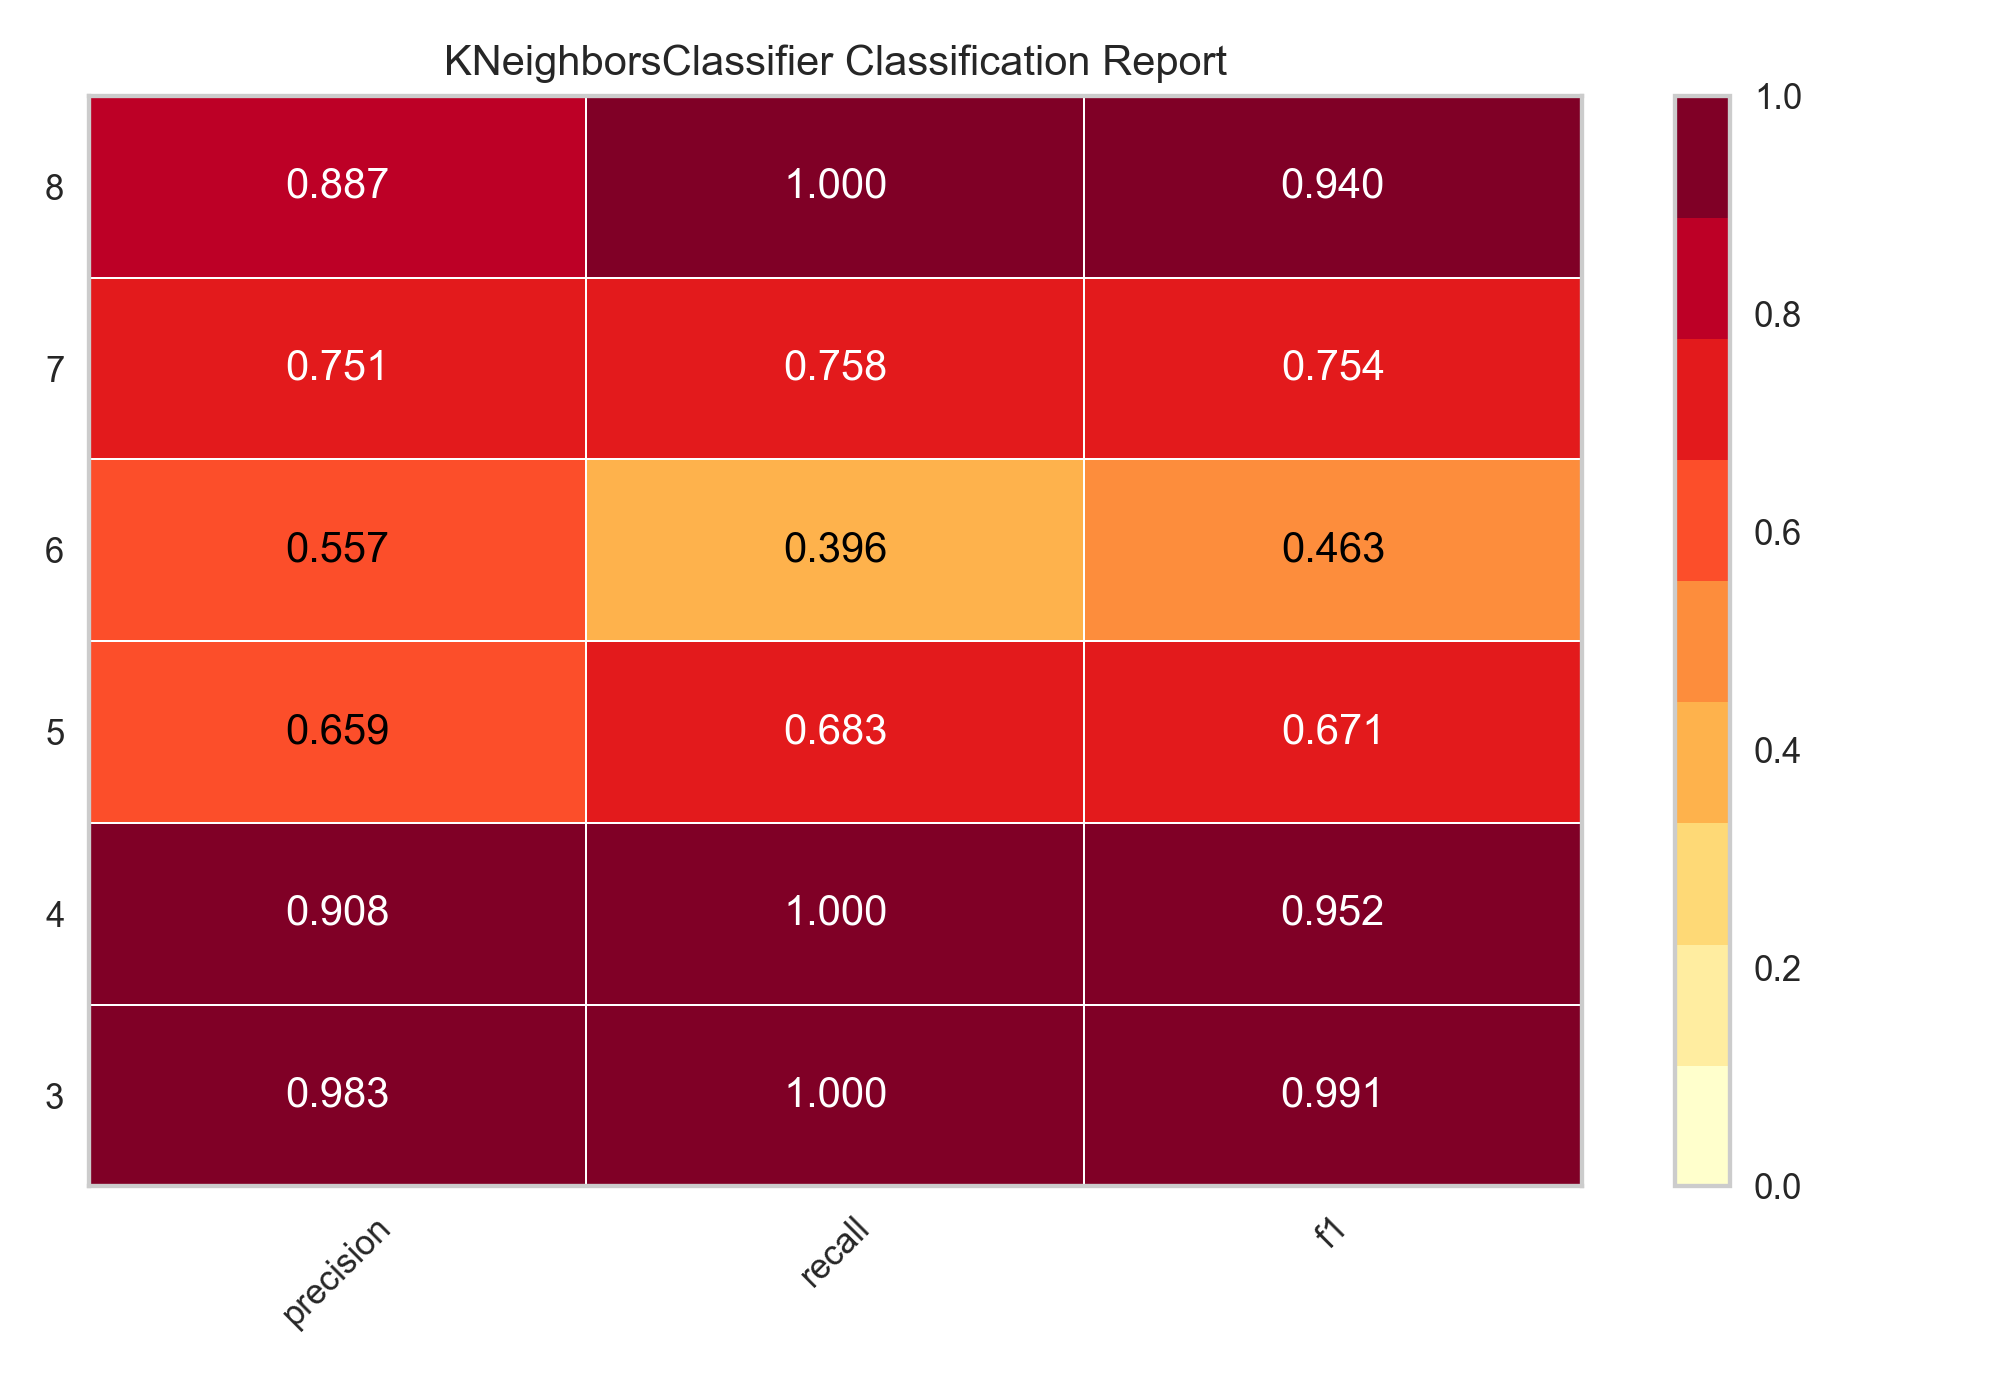

In [149]:
knn = classifier_graph(KNeighborsClassifier())

<IPython.core.display.Javascript object>


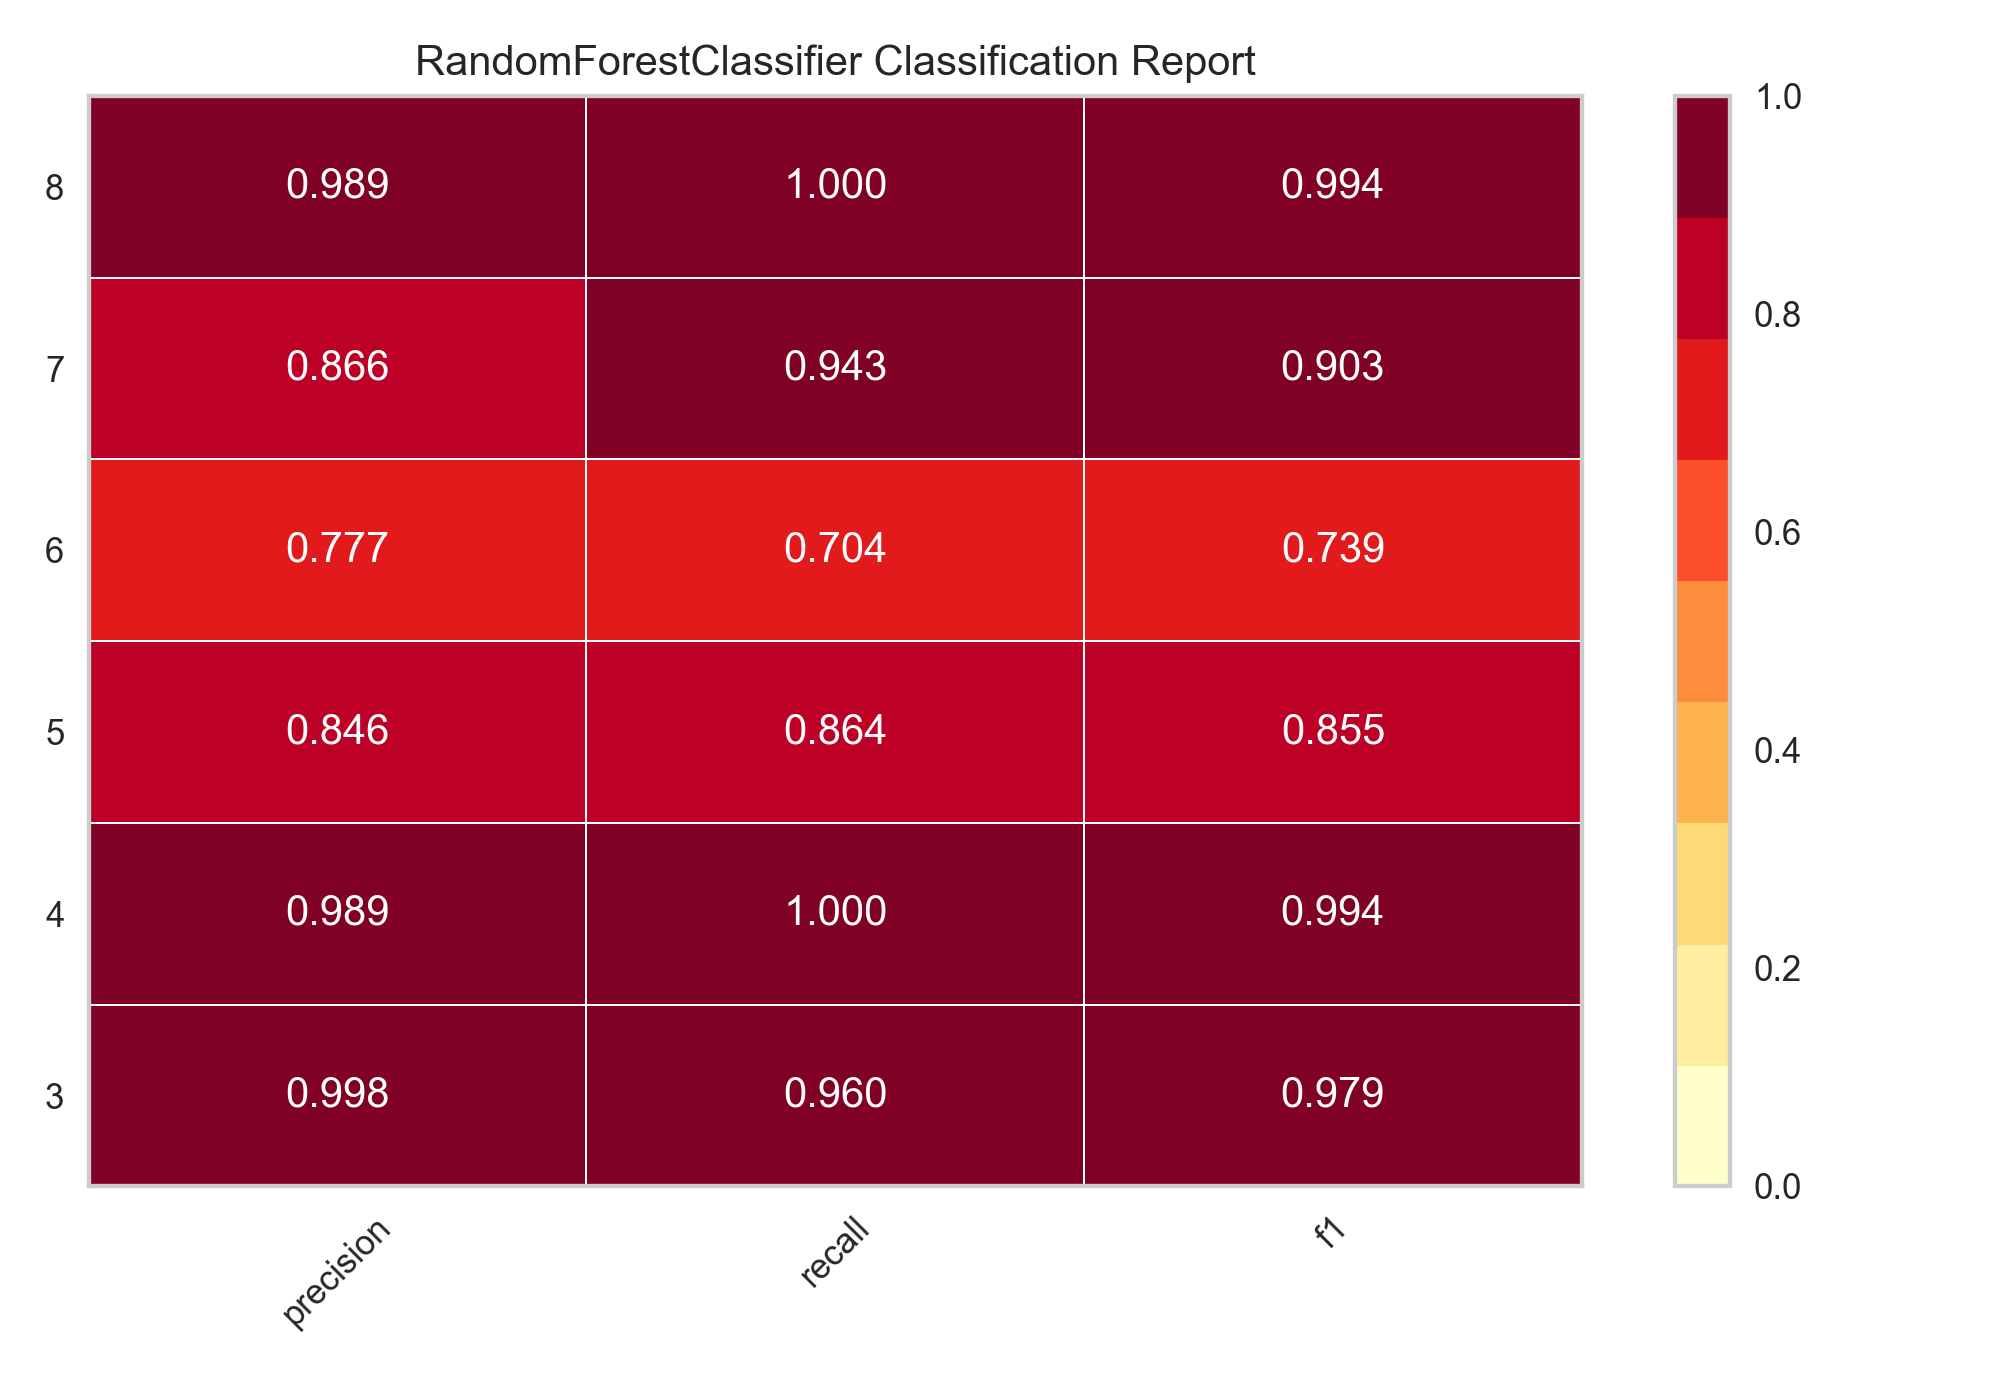

In [150]:
forest = classifier_graph(RandomForestClassifier(n_estimators=100,n_jobs = -1))

As it can be appreciated here, Upsampling significantly solved the problem of class imbalance:

## Hyperparameter Tunning:

In [157]:
def gridsearch(model, parameters):
    grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 4, n_jobs = -1, verbose = 10)
    grid_search = grid_search.fit(X_train, y_train)
    score = grid_search.best_score_
    best_params = grid_search.best_params_
    return score, best_params

In [160]:
KNN = KNeighborsClassifier()
RNF = RandomForestClassifier()
list_params = [{'n_neighbors':[3, 5, 10, 30, 50]}, {'n_estimators' :[50,128,300, 500, 1000]},]


models = [KNN, RNF]

In [161]:
scores_dict = {'Accuracy': [], 'best_params': []}

if __name__ == '__main__':

    for model, param in zip(models, list_params):

        acu, best_params = gridsearch(model, param)
        scores_dict['Accuracy'].append(acu)
        scores_dict['best_params'].append(best_params)

        print (scores_dict)

    with open('gridsearch_class.pickle', 'wb') as grid:
        pickle.dump(scores_dict, grid)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    5.3s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    5.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    6.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:    8.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    9.0s finished


{'Accuracy': [0.8445726356841079], 'best_params': [{'n_neighbors': 3}]}
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    7.4s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:   11.3s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:   18.2s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:   29.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   30.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   30.2s finished


{'Accuracy': [0.8445726356841079, 0.9178583035424115], 'best_params': [{'n_neighbors': 3}, {'n_estimators': 1000}]}


# Final Models

In [192]:
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs= -1) 
rnf = RandomForestClassifier(n_estimators = 500, n_jobs= -1)

In [194]:
def sampling_offensegroup(features, target, average, pickle_file, pickle_estimators):
    
    
    scores = {'accuracy_knn':[], 'f1_knn':[], 'precision_knn':[], 'recall_knn':[],
                          'accuracy_rnf':[], 'f1_rnf':[], 'precision_rnf':[], 'recall_rnf':[]}
    
    skf = StratifiedKFold(n_splits=12)

    for train_index, test_index in skf.split(features, target):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = target[train_index], target[test_index]
    
        # scaling:
        scaler = StandardScaler()
        X_train = scaler.fit(X_train).transform(X_train)
        X_test = scaler.fit(X_test).transform(X_test)
    
        # knn:
        fitted_knn = knn.fit(X_train, y_train)
        predicted_knn = knn.predict(X_test)
        report_knn = classification_report(y_test, predicted_knn)
        scores['accuracy_knn'].append(accuracy_score(y_test, predicted_knn))
        scores['f1_knn'].append(f1_score(y_test, predicted_knn, average = average))
        scores['precision_knn'].append(precision_score(y_test, predicted_knn, average = average))
        scores['recall_knn'].append(recall_score(y_test, predicted_knn, average = average))   
                                      
                                      
        # rnf:
        fitted_rnf = rnf.fit(X_train, y_train)
        predicted_rnf = rnf.predict(X_test)
        report_rnf = classification_report(y_test, predicted_rnf)
        scores['accuracy_rnf'].append(accuracy_score(y_test, predicted_rnf))
        scores['f1_rnf'].append(f1_score(y_test, predicted_rnf, average = average))
        scores['precision_rnf'].append(precision_score(y_test, predicted_rnf, average = average))
        scores['recall_rnf'].append(recall_score(y_test, predicted_rnf, average = average))
                                    
    
        print(scores)
    
        # write to disc.
    
        with open(pickle_file, 'wb') as files:
            pickle.dump([fitted_knn, fitted_rnf] , files)
        
        with open(pickle_estimators, 'wb') as estimator:
            pickle.dump([predicted_knn, predicted_rnf,report_knn, report_rnf] , estimator)
            
        
    return (scores)

In [200]:
if __name__ == '__main__':
   
    report = sampling_offensegroup(X.values, y.values, 'micro', 'files.pickle',
                                                  'estimators.pickle')

{'accuracy_knn': [0.8307453416149069], 'f1_knn': [0.8307453416149069], 'precision_knn': [0.8307453416149069], 'recall_knn': [0.8307453416149069], 'accuracy_rnf': [0.781832298136646], 'f1_rnf': [0.7818322981366461], 'precision_rnf': [0.781832298136646], 'recall_rnf': [0.781832298136646]}
{'accuracy_knn': [0.8307453416149069, 0.8245341614906833], 'f1_knn': [0.8307453416149069, 0.8245341614906833], 'precision_knn': [0.8307453416149069, 0.8245341614906833], 'recall_knn': [0.8307453416149069, 0.8245341614906833], 'accuracy_rnf': [0.781832298136646, 0.7756211180124224], 'f1_rnf': [0.7818322981366461, 0.7756211180124224], 'precision_rnf': [0.781832298136646, 0.7756211180124224], 'recall_rnf': [0.781832298136646, 0.7756211180124224]}
{'accuracy_knn': [0.8307453416149069, 0.8245341614906833, 0.819672131147541], 'f1_knn': [0.8307453416149069, 0.8245341614906833, 0.819672131147541], 'precision_knn': [0.8307453416149069, 0.8245341614906833, 0.819672131147541], 'recall_knn': [0.8307453416149069, 0.

{'accuracy_knn': [0.8307453416149069, 0.8245341614906833, 0.819672131147541, 0.8204527712724434, 0.8313817330210773, 0.8415300546448088, 0.8571428571428571, 0.8415300546448088, 0.8821233411397346, 0.8969555035128806], 'f1_knn': [0.8307453416149069, 0.8245341614906833, 0.819672131147541, 0.8204527712724433, 0.8313817330210773, 0.8415300546448087, 0.8571428571428571, 0.8415300546448087, 0.8821233411397346, 0.8969555035128806], 'precision_knn': [0.8307453416149069, 0.8245341614906833, 0.819672131147541, 0.8204527712724434, 0.8313817330210773, 0.8415300546448088, 0.8571428571428571, 0.8415300546448088, 0.8821233411397346, 0.8969555035128806], 'recall_knn': [0.8307453416149069, 0.8245341614906833, 0.819672131147541, 0.8204527712724434, 0.8313817330210773, 0.8415300546448088, 0.8571428571428571, 0.8415300546448088, 0.8821233411397346, 0.8969555035128806], 'accuracy_rnf': [0.781832298136646, 0.7756211180124224, 0.7868852459016393, 0.7939110070257611, 0.8009367681498829, 0.8540202966432474, 0.

In [203]:
report = pd.DataFrame(report)
report

,accuracy_knn,f1_knn,precision_knn,recall_knn,accuracy_rnf,f1_rnf,precision_rnf,recall_rnf
0,0.830745,0.830745,0.830745,0.830745,0.781832,0.781832,0.781832,0.781832
1,0.824534,0.824534,0.824534,0.824534,0.775621,0.775621,0.775621,0.775621
2,0.819672,0.819672,0.819672,0.819672,0.786885,0.786885,0.786885,0.786885
3,0.820453,0.820453,0.820453,0.820453,0.793911,0.793911,0.793911,0.793911
4,0.831382,0.831382,0.831382,0.831382,0.800937,0.800937,0.800937,0.800937
5,0.841530,0.841530,0.841530,0.841530,0.854020,0.854020,0.854020,0.854020
6,0.857143,0.857143,0.857143,0.857143,0.840749,0.840749,0.840749,0.840749
7,0.841530,0.841530,0.841530,0.841530,0.811085,0.811085,0.811085,0.811085
8,0.882123,0.882123,0.882123,0.882123,0.902420,0.902420,0.902420,0.902420
9,0.896956,0.896956,0.896956,0.896956,0.932865,0.932865,0.932865,0.932865


## Final Notes:
    
1. Using Upsampling significantly improved the accuracy of the models. 
2. There was no need of doing feature elimination.
3. Since the features were all numeric, there was no need of performing Label Encoding on the dataset.
4. Since the scores were high in almost all the classes, there was no need of reducing the number of classes.
